<a href="https://colab.research.google.com/github/alishayakmal/HR-attrition-and-budgeting-/blob/master/HR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing files into Google Colabs


In [2]:
#upload the file from running this code (importing the dataset)
#from google.colab import files
#files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition (1).csv to WA_Fn-UseC_-HR-Employee-Attrition (1).csv


{'WA_Fn-UseC_-HR-Employee-Attrition (1).csv': b'\xef\xbb\xbfAge,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager\r\n41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5\r\n49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7\r\n37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,239

# Installing Environment

In [3]:

import pandas as pd   
import numpy as np    
import io
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve, log_loss
SEED = 42
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl
from sklearn.metrics import roc_curve, auc

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
% matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

#preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder


from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Exploratory Data Analysis



Below we are reading the document to see the summary of the data .In this dataset it contains **1470 **rows and **35 **columns. 
It also shows the average of each column such as average age in the company is **36** with **2.7 rating **for job statisfaction.The least amount of budget spent on  an employee is **1009 **with a minimum  increase of  **3% **in their salary per year.Standhours in this company an employee spent is **80 hours**  per week who  would   remain in the same role for **less than** 8 years. On average employees remain in the company for **7 years **spending **4 years** with the current managers
```



In [4]:

HR = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition (1).csv')


HR.describe()





,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


There is no missing data and there are 35 attribute in which **74%** are integers and **25%** are object



In [5]:
HR.isnull().values.any()
 

False

**Life Science** are mostly hired , there are **more** male than female .Sales department has the **largest number **of employees in the company

In [6]:
#Print all of the object data types and their unique values 
for column in HR.columns: 
  if HR[column].dtype == object:
     print(str(column) + ':' + str(HR[column].unique()))
     print(HR[column].value_counts())
     print('_____________________________')

Attrition:['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
_____________________________
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
_____________________________
Department:['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_____________________________
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
_____________________________
Gender:['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
_____________________________
JobRole:['Sales Executive' 'Research Scientist' '

Several numerical features are rightly skewed therefore data transformation methods may be required to approach a normal distrubituon prior to fitting a model to the data.

This also shows most employees in this company are between **25 and 45 years** old 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9da95d748>,
      dtype=object)

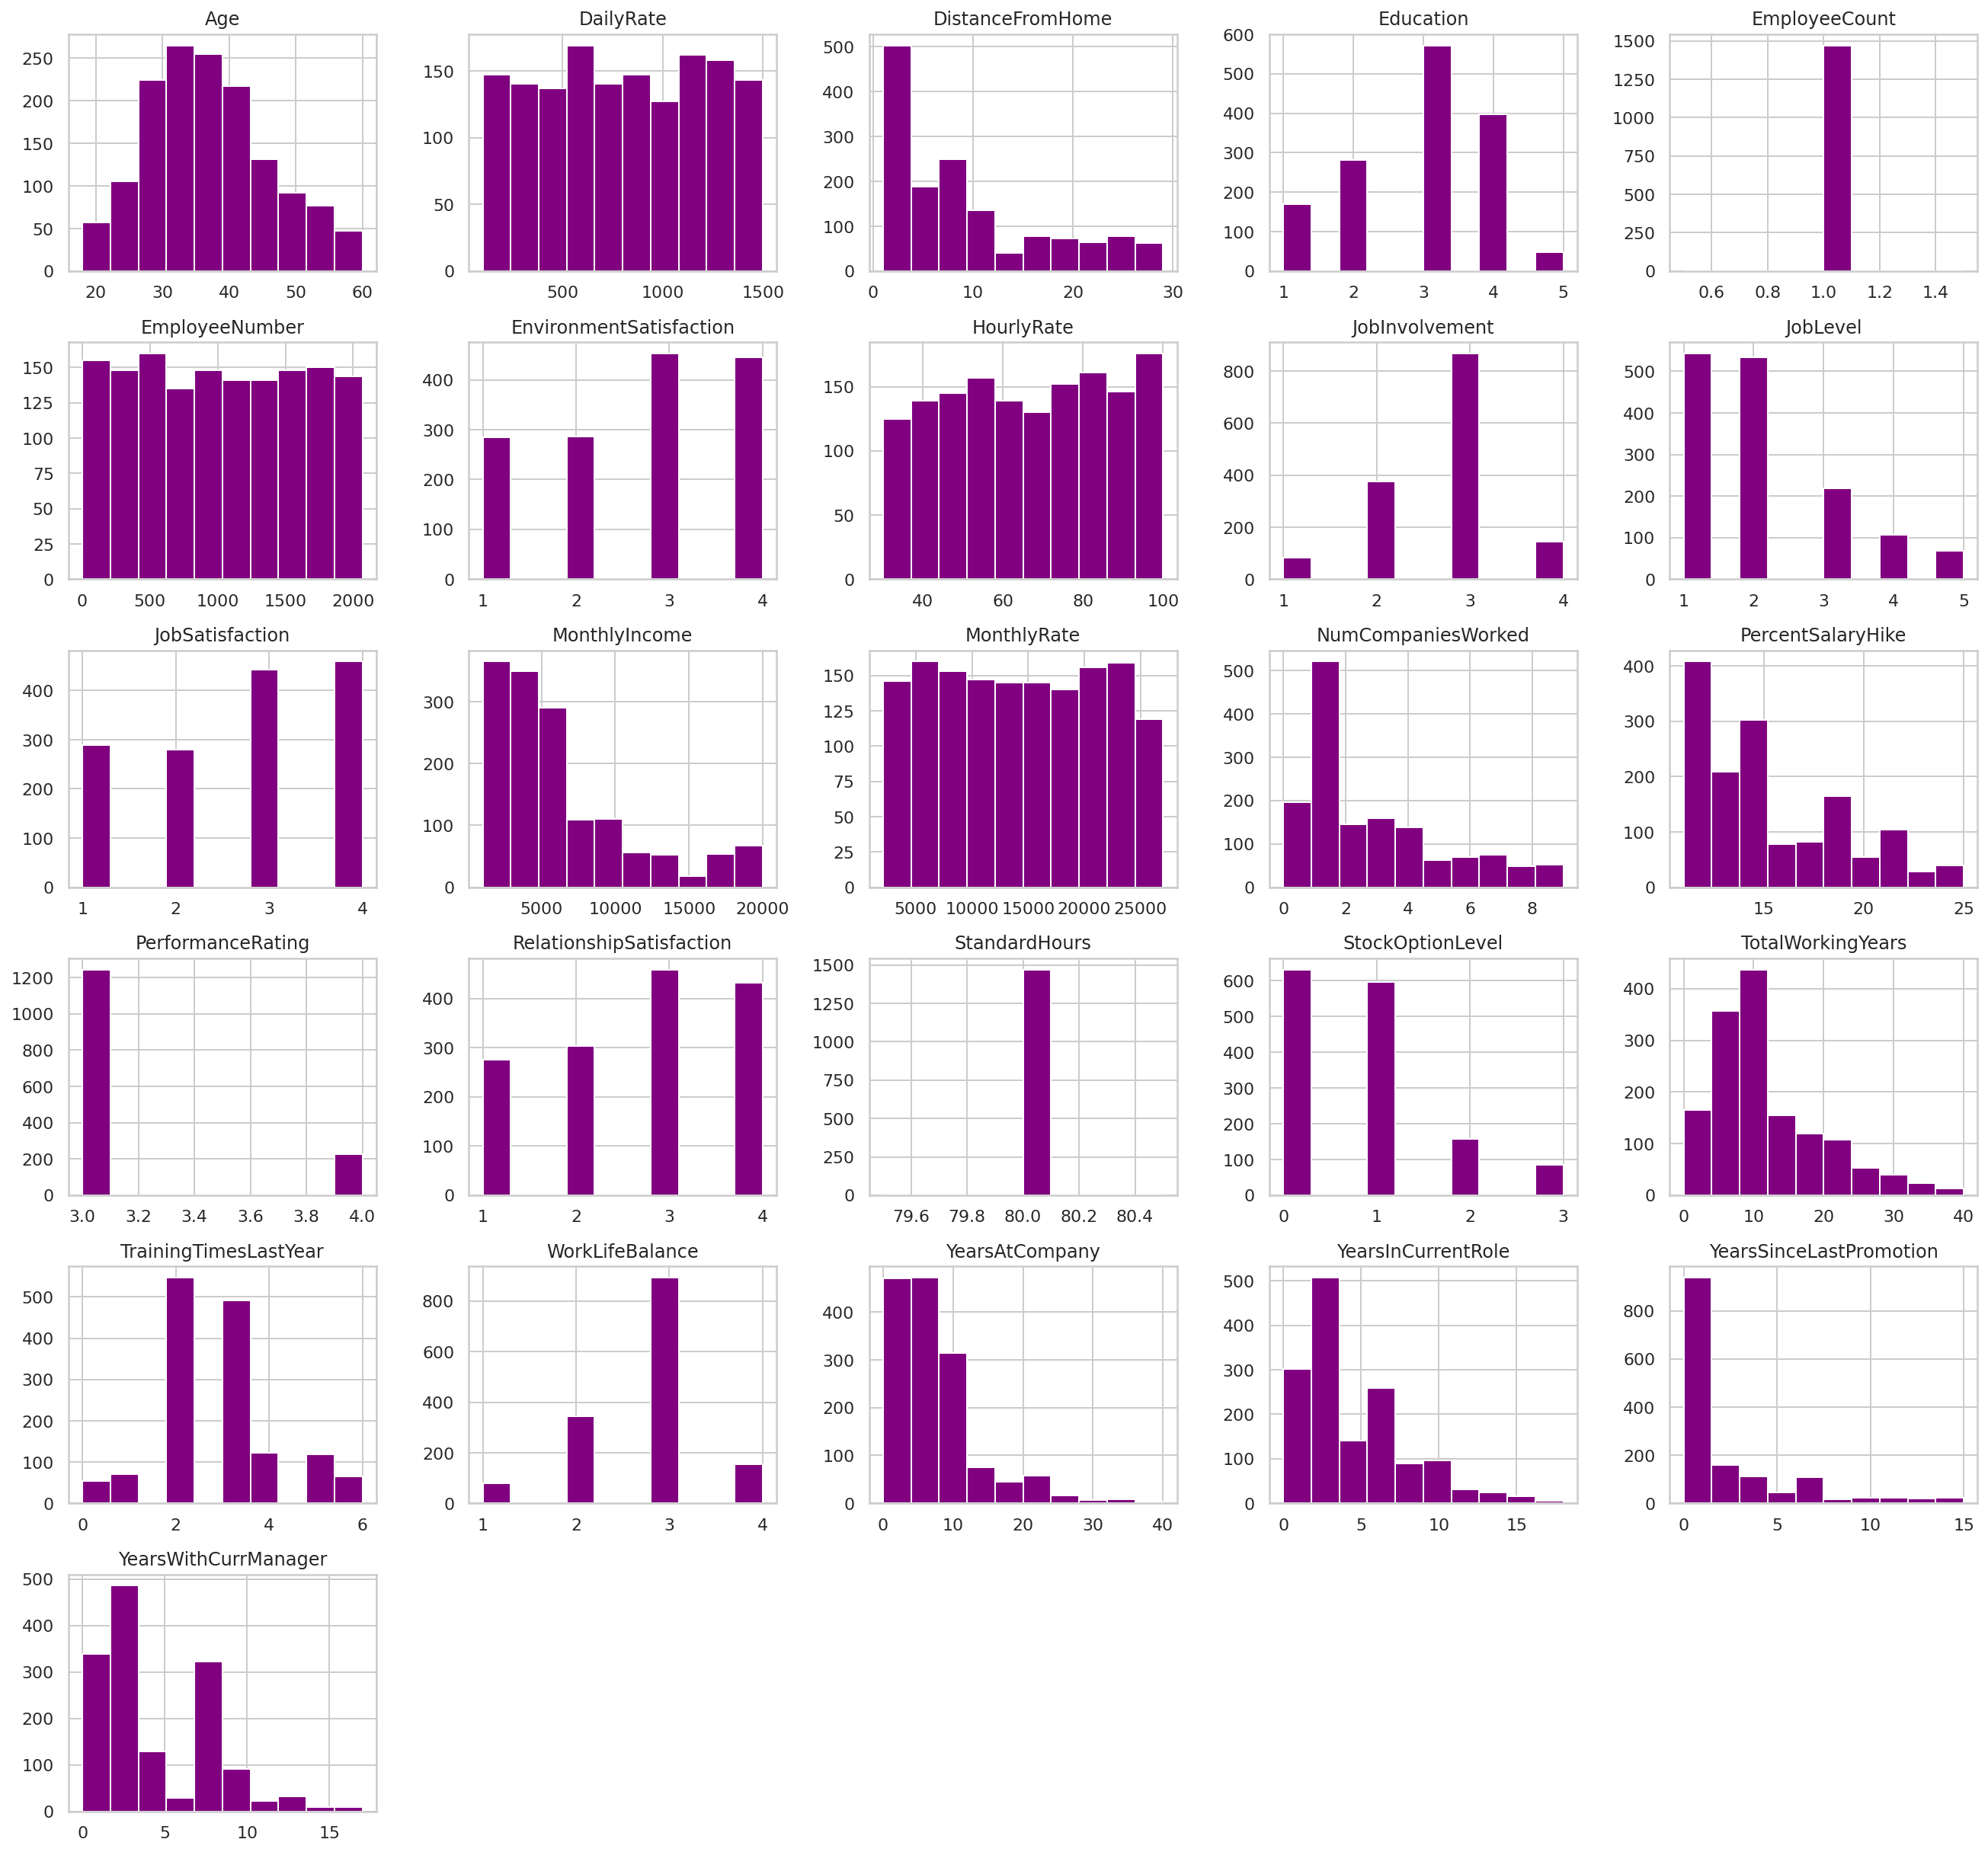

In [7]:
HR.hist(figsize = (20,20),color = 'Purple')

There are total of **1470** employee in which **16%** of them left the company. Below we are going to visualize  different attribute to understand what caused the employees to leave 


No     1233
Yes     237
Name: Attrition, dtype: int64
No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


Text(0.5, 1.0, 'Attrition')

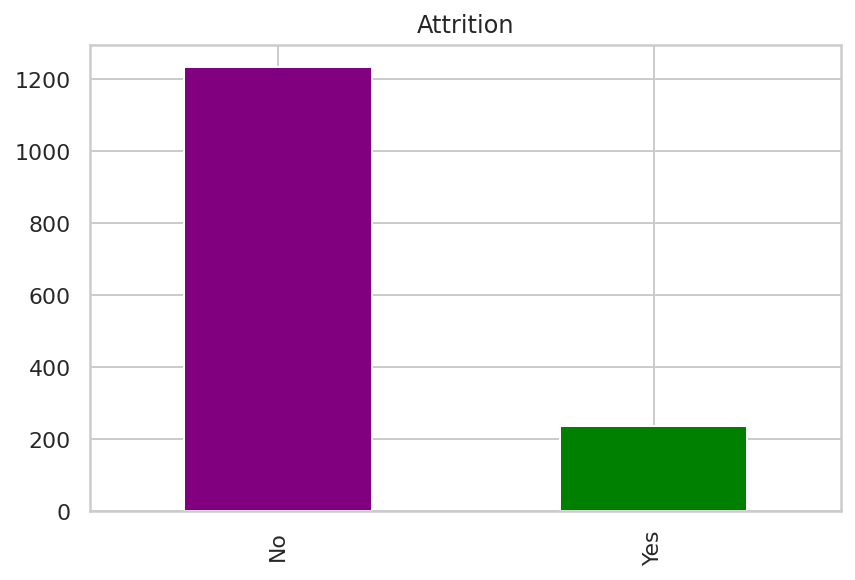

In [8]:
print(HR.Attrition.value_counts())
print(HR.Attrition.value_counts(normalize=True))
HR['Attrition'].value_counts().plot(kind= 'bar', color=('Purple','green')).set_title('Attrition')





This figure show most employee who leave have a job role in  either **Sales Executives** or **Research Scientist **

163.33333333333334
163.33333333333334


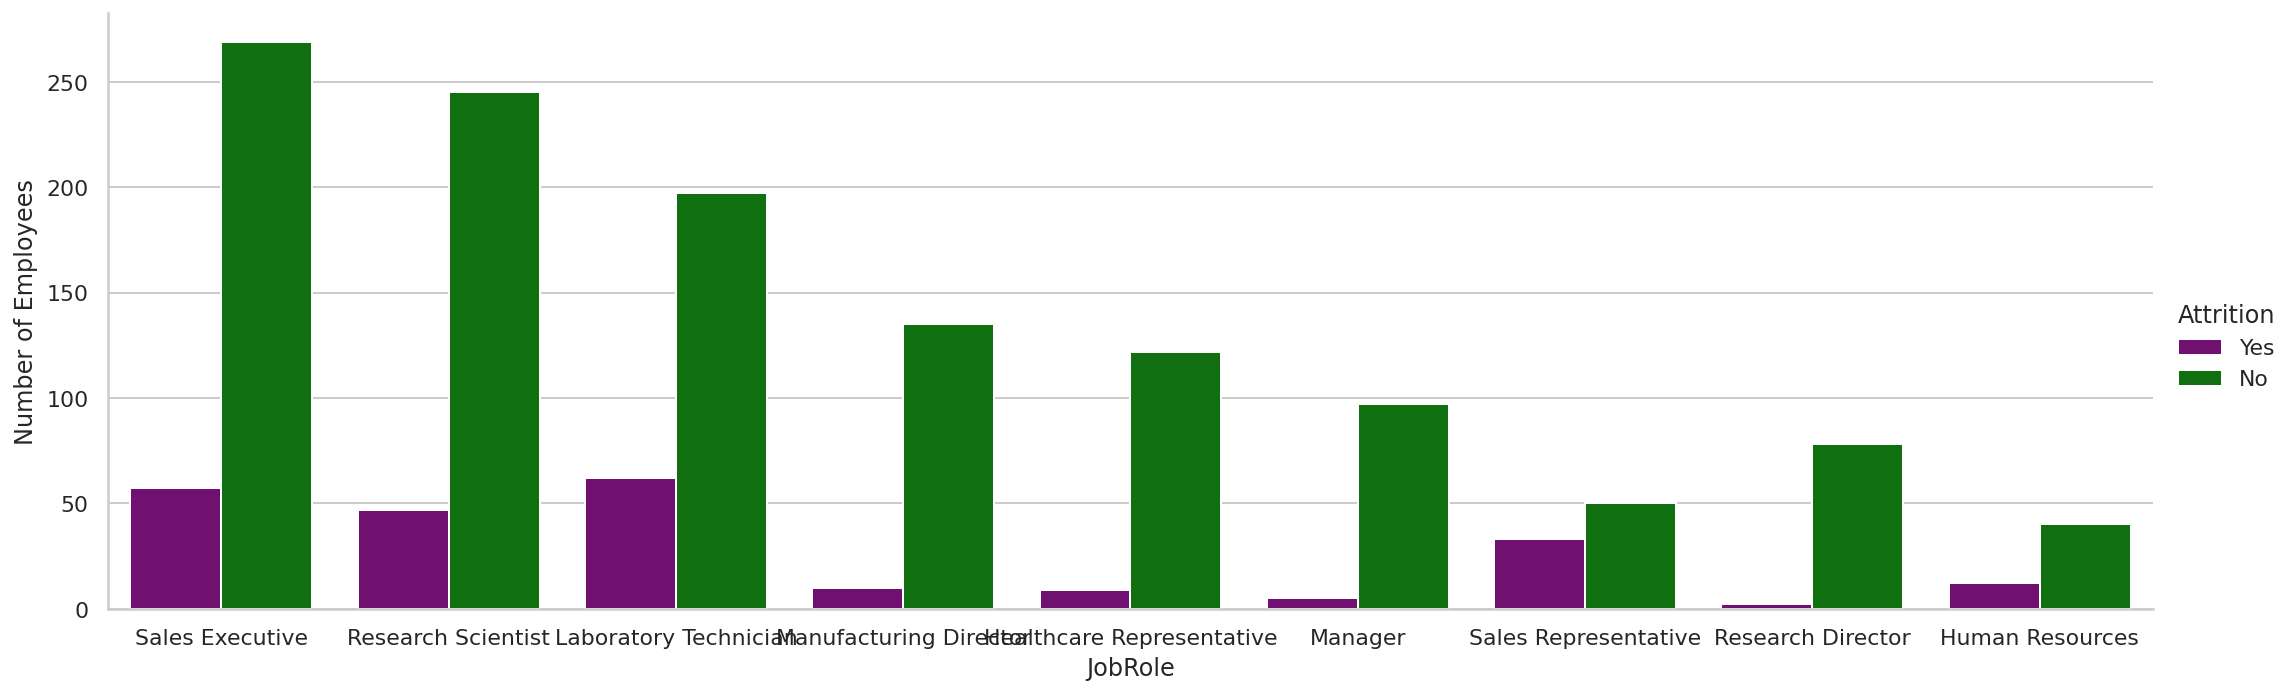

In [9]:
#job role has the most impact on attrition  we can sales attirition has the most job role 
print(HR.JobRole.value_counts().mean())
print(HR.JobRole.value_counts().mean())

sns.axes_style('whitegrid')
sns.catplot('JobRole', data=HR, aspect=3, kind='count', hue='Attrition', palette=['purple', 'green']).set_ylabels('Number of Employees')

On average employee who leave the company are between **29 and 31**

*   List item
*   List item



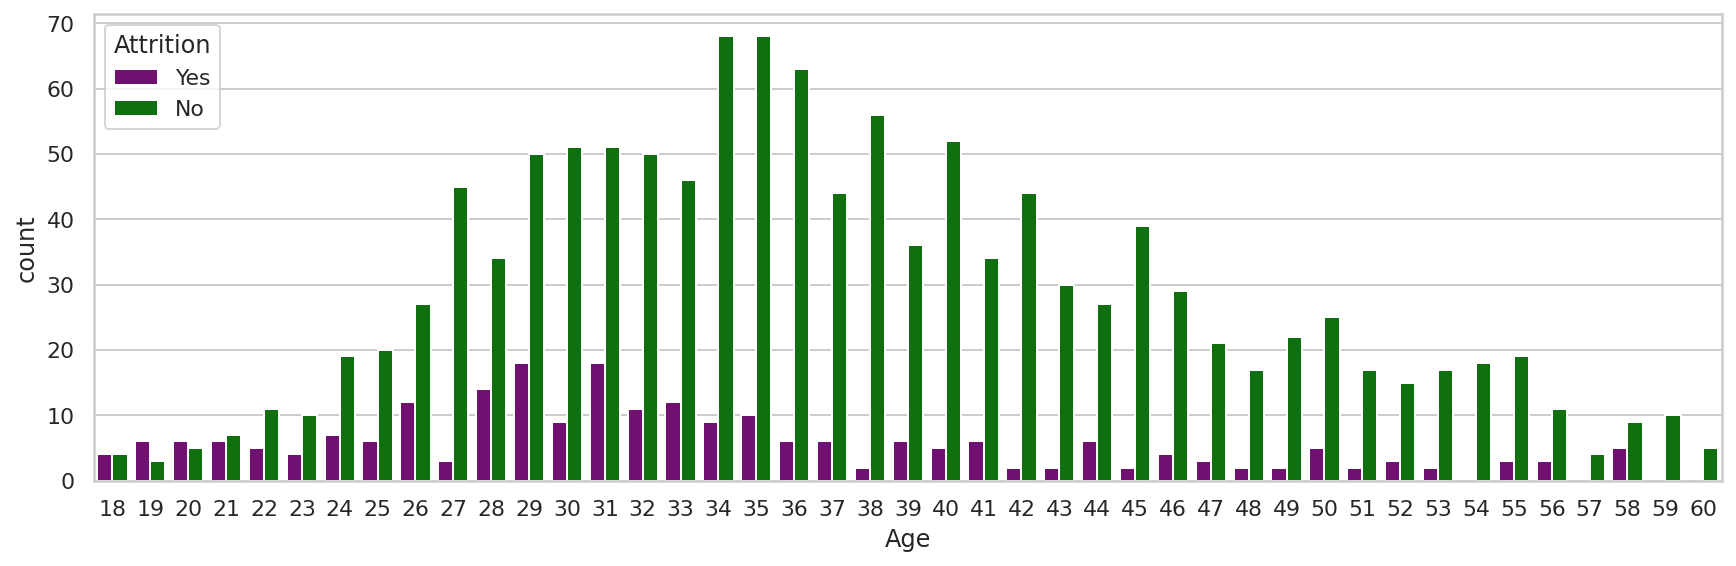

In [10]:
plt.subplots(figsize =(13,4))
sns.countplot(x='Age', hue ='Attrition',data = HR ,palette = ('purple','green'))


This shows employee count and standard hours needs to be removed

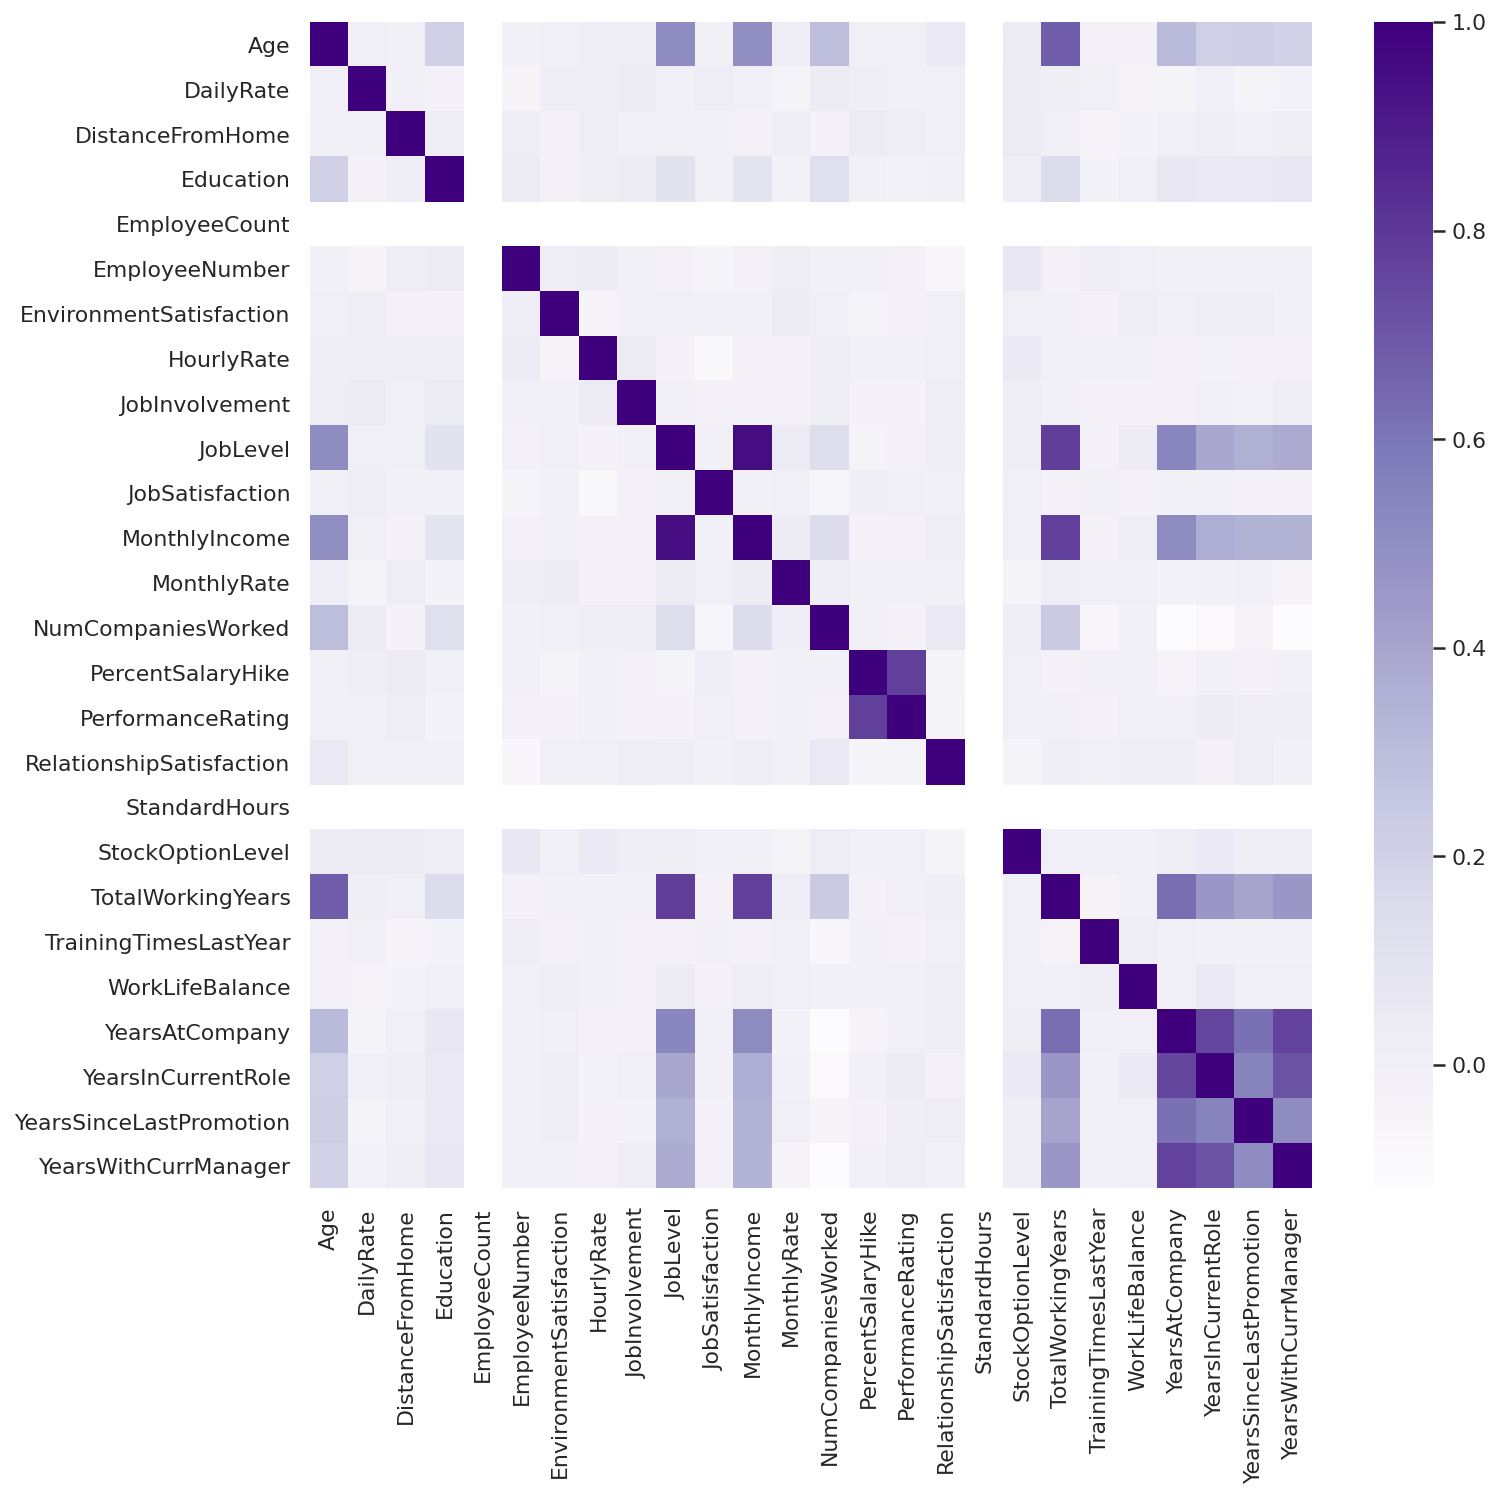

In [11]:
corr=HR.corr()
corr=(corr)
plt.figure(figsize=(10, 10))
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,cmap='Purples')
#Monthly income,Job level are dependent upon the TotalWorkingYears
#PerformanceRating is highly correlated with PercentSalaryhikeing 

Dropping irrelavant columns:

1) All employees are over18 therefore this column is irrelavant

2)Employee numbers are unique identifier hence doesnt have any value 

3)Standhours in the company for each employee is 80

4) Employee count brings doesnt add value

In [12]:
HR = HR.drop('Over18', axis =1 )
HR = HR.drop('EmployeeNumber', axis = 1 )
HR = HR.drop('StandardHours',axis =1 )
HR = HR.drop('EmployeeCount', axis =1 )

This shows the number of years worked decide  the job level of the employees and the monthly income.The higher job level,higher performance rating  then higher the salary increase. 

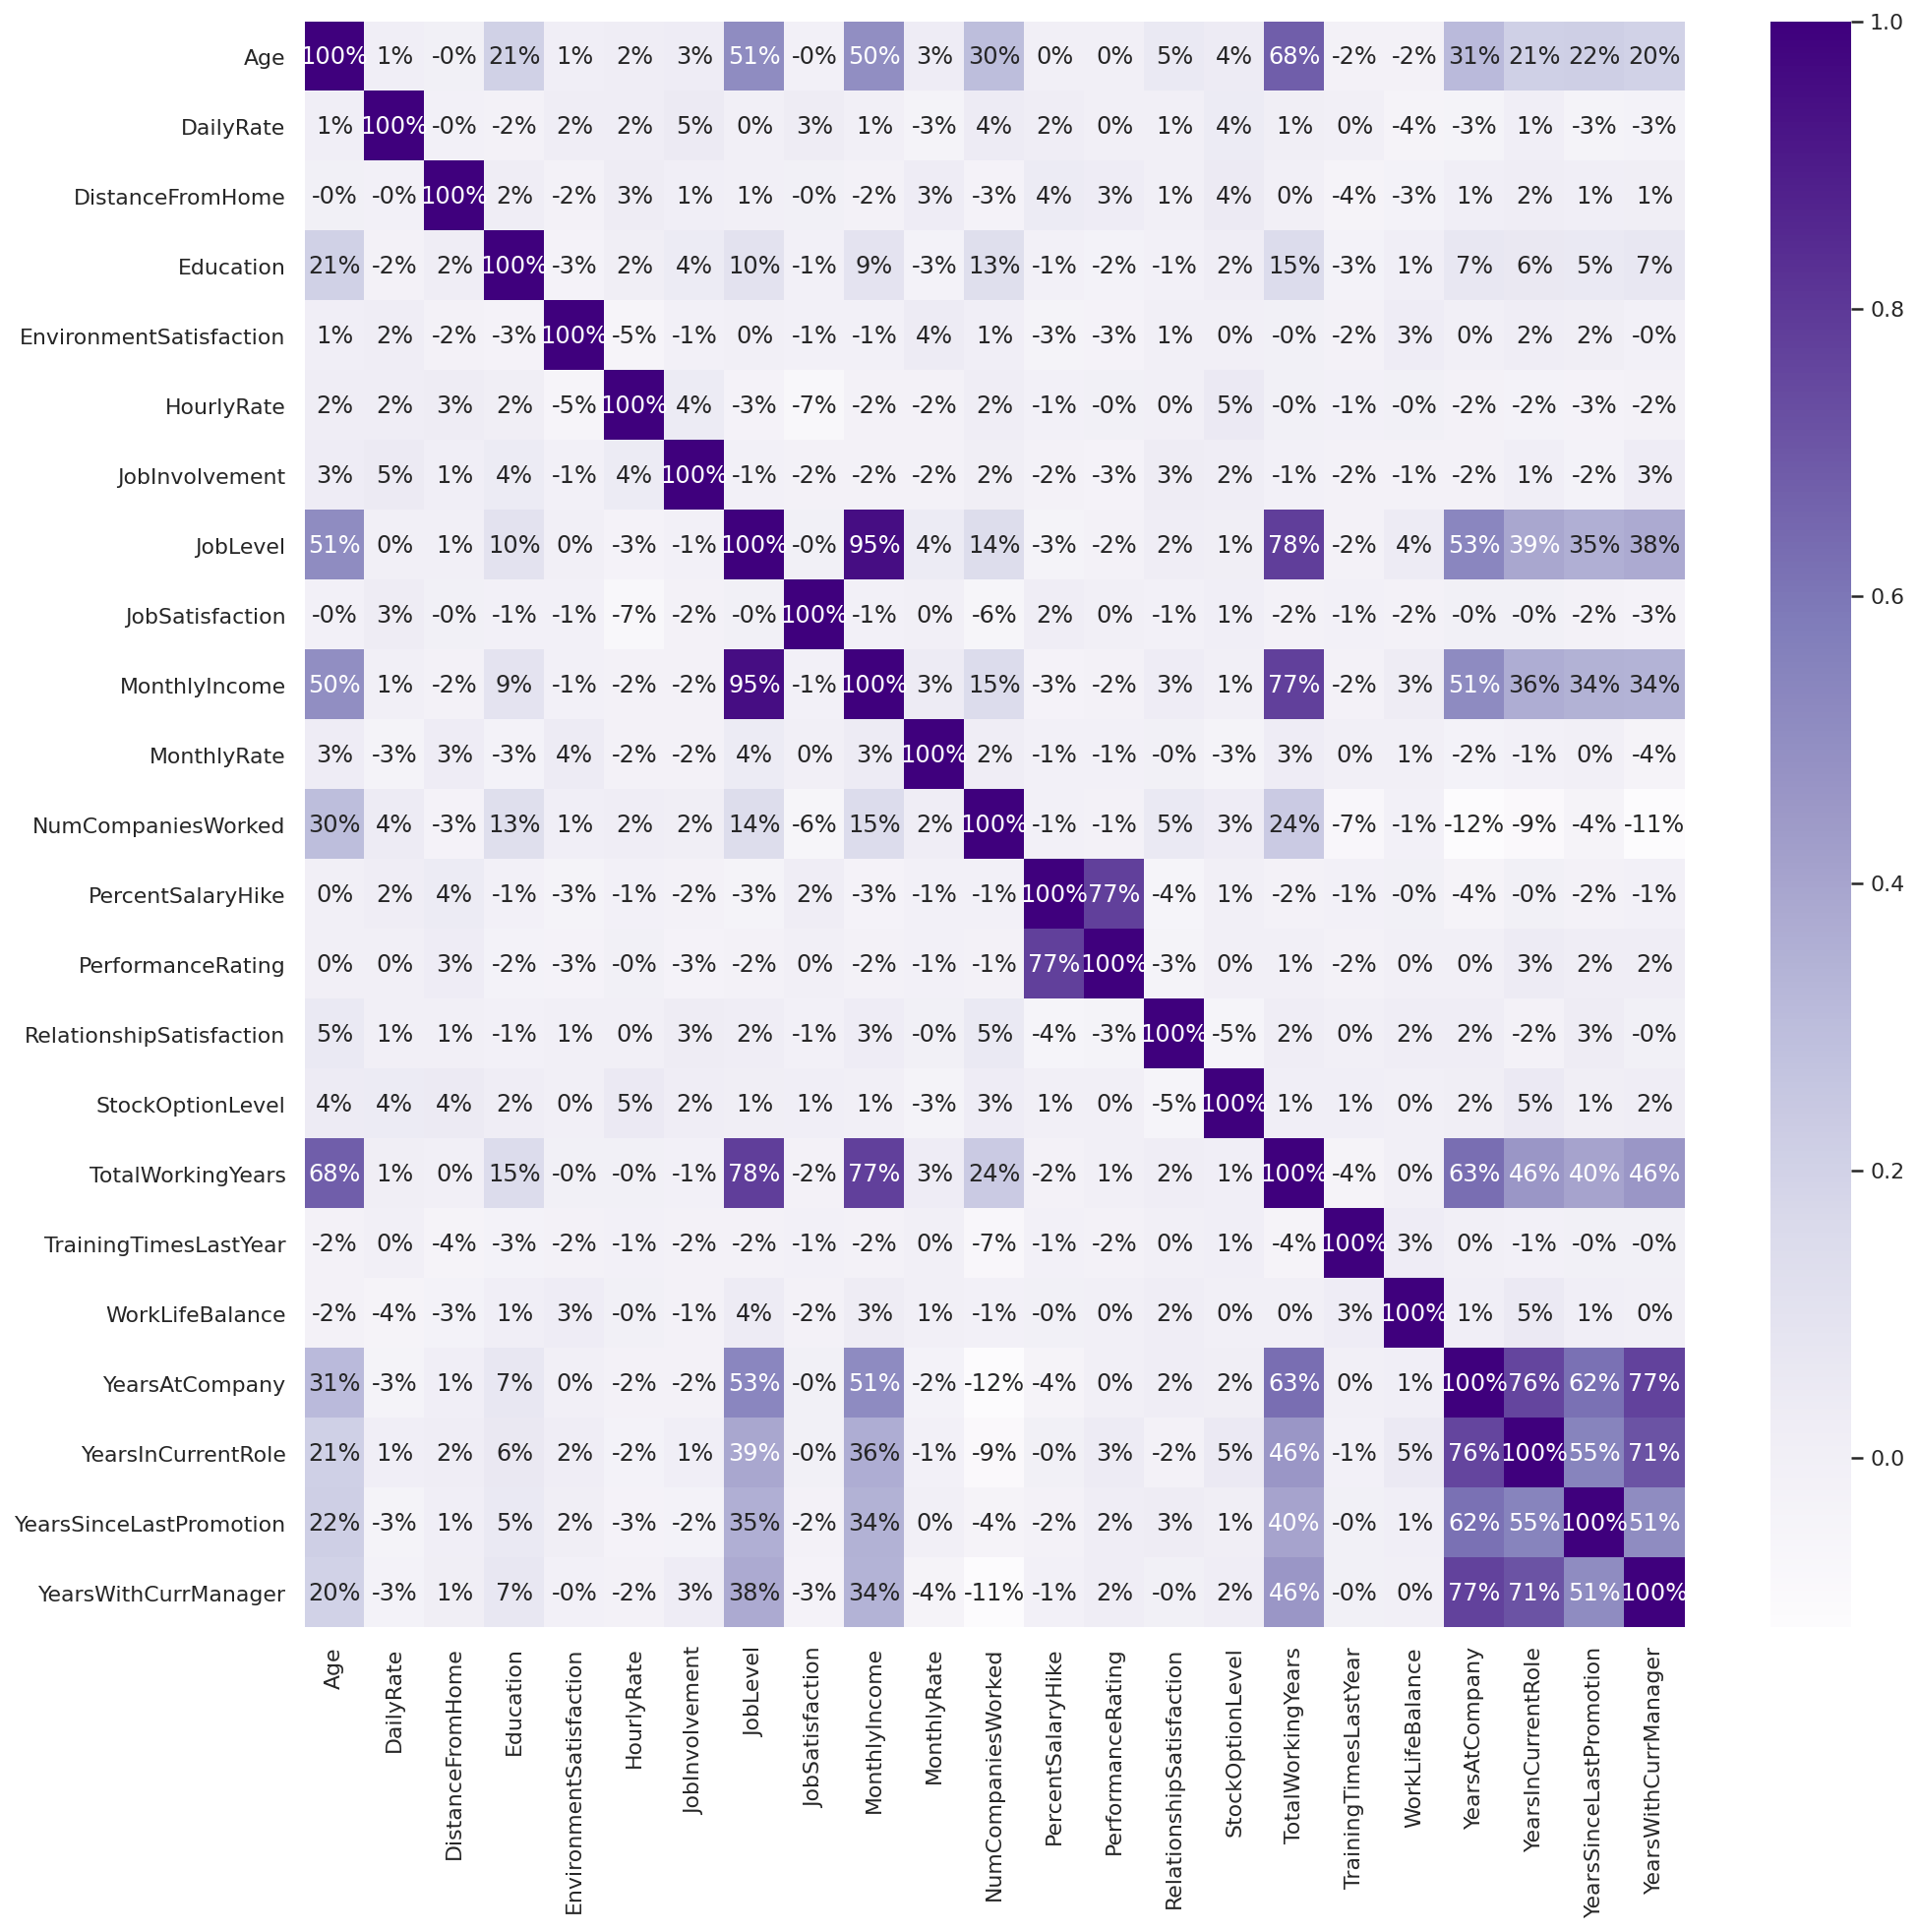

In [13]:
corr=HR.corr()
corr=(corr)
plt.figure(figsize=(14, 14))
sns.heatmap(corr,annot= True,fmt='.0%',
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,cmap='Purples')



Change the catogerical data type into numerical data type 


# Feature Selection 


In [14]:
from sklearn.preprocessing import LabelEncoder
for column in HR.columns:
   if HR[column].dtype == np.number:
    continue 
   HR[column] = LabelEncoder().fit_transform(HR[column])

Ensure the changes have been made 


In [15]:
HR

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,1,3,2,1,11,3,1,2,3,1,210,599,4,0,6,0,2,1,17,3,2,5,2,0,3
1466,21,0,2,327,1,5,0,3,3,1,12,1,2,0,0,1,1070,1123,4,0,4,0,0,1,9,5,2,7,7,1,7
1467,9,0,2,39,1,3,2,1,1,1,57,3,1,4,1,1,821,175,1,1,9,1,1,1,6,0,2,6,2,0,3
1468,31,0,1,579,2,1,2,3,3,1,33,1,1,7,1,1,730,641,2,0,3,0,3,0,17,3,1,9,6,0,8


In order to split data accurately its important to move the attrition column to first column 



In [16]:
HR['Age_Years'] = HR['Age']

In [17]:
HR = HR.drop('Age',axis = 1 )

In [18]:
HR

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,1,2,624,2,0,1,1,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5,23
1,0,1,113,1,7,0,1,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7,31
2,1,2,805,1,1,1,4,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0,19
3,0,1,820,1,2,3,1,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0,15
4,0,2,312,1,1,0,3,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,494,1,22,1,3,2,1,11,3,1,2,3,1,210,599,4,0,6,0,2,1,17,3,2,5,2,0,3,18
1466,0,2,327,1,5,0,3,3,1,12,1,2,0,0,1,1070,1123,4,0,4,0,0,1,9,5,2,7,7,1,7,21
1467,0,2,39,1,3,2,1,1,1,57,3,1,4,1,1,821,175,1,1,9,1,1,1,6,0,2,6,2,0,3,9
1468,0,1,579,2,1,2,3,3,1,33,1,1,7,1,1,730,641,2,0,3,0,3,0,17,3,1,9,6,0,8,31


In [19]:
X = HR.iloc[:,[0] + list(range(2,31))].values
y = HR.iloc[:,1].values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:,1] = labelencoder_X_1.fit_transform(X[:,1])
X[:,3] = labelencoder_X_1.fit_transform(X[:,3])
X[:,6] = labelencoder_X_1.fit_transform(X[:,6])
X[:,10] = labelencoder_X_1.fit_transform(X[:,10])
X[:,14] = labelencoder_X_1.fit_transform(X[:,14])
X[:,16] = labelencoder_X_1.fit_transform(X[:,16])
X[:,20] = labelencoder_X_1.fit_transform(X[:,20])
X[:,21] = labelencoder_X_1.fit_transform(X[:,21])
y = labelencoder_X_1.fit_transform(y)

model = RandomForestClassifier()
model.fit(X,y) # Output shown below

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
list_importances=list(model.feature_importances_)
indices=sorted(range(len(list_importances)), key=lambda k
               :list_importances[k])
feature_selected=[None]*34
k=0
for i in reversed(indices):
    if k<=33:
        feature_selected[k]=i
        k=k+1
X_selected = X[:,feature_selected[:18]]
l_features=feature_selected
i=0
for x in feature_selected:
    l_features[i] = HR.columns[x]
    i=i+1
l_features = np.array(l_features)
#Extracting 17 most important features among 34 features
l_features[:18] #Output shown below

array(['MaritalStatus', 'MonthlyIncome', 'BusinessTravel', 'Gender',
       'YearsWithCurrManager', 'Department', 'StockOptionLevel',
       'OverTime', 'WorkLifeBalance', 'MonthlyRate',
       'YearsSinceLastPromotion', 'YearsAtCompany', 'YearsInCurrentRole',
       'JobLevel', 'TotalWorkingYears', 'DistanceFromHome', 'Education',
       'PerformanceRating'], dtype=object)

In [21]:
model = RandomForestClassifier()
model.fit(X,y) # Output shown below

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 18)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 18
Selected Features: [ True False  True False False  True False  True False  True  True  True
  True  True False False  True  True  True  True  True False  True  True
  True False False  True False False]
Feature Ranking: [ 1 12  1  8  2  1  4  1 10  1  1  1  1  1 11 13  1  1  1  1  1  3  1  1
  1  6  7  1  5  9]




Selected attributes suggestion : 1)Daily rate  2)Education field 3) Enivornment satisfication
4)Hourly Rate  5)Job invovlement , 6Job role , 7)job  statisfcation  8)Monthly income 9) Monthly rate  10) Perecent salary hike 11)Perfomance rating 12)relationshipsatisfaction 
13)Training time last year 14)yearssincelastpromotion 15)yearsincurrentrole  16)worklifebalance 17) YearswithCur Manager  18)Years at company  19)Stockoptionlevel



In [23]:
HR = HR.drop('Education', axis =1 )


# Algorithms

Dropped the following columns :  Education,Employee count ,Over18,EmployeeNumber and StandardHours


In [24]:
X = HR.iloc[:,1:HR.shape[1]].values
Y = HR.iloc[:,0].values

In [25]:
#Split the data into 75% training and 25 testing 

X_train ,X_test,Y_train , Y_test = train_test_split(X,Y , test_size = 0.25 , random_state = 42 )

**Using Random forest Classifier** 


In [26]:
forest = RandomForestClassifier(n_estimators = 10 , criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train )

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

**This shows the accuracy of model is 86% **


[[317   3]
 [ 43   5]]
Model Testing Accuracy = 0.875


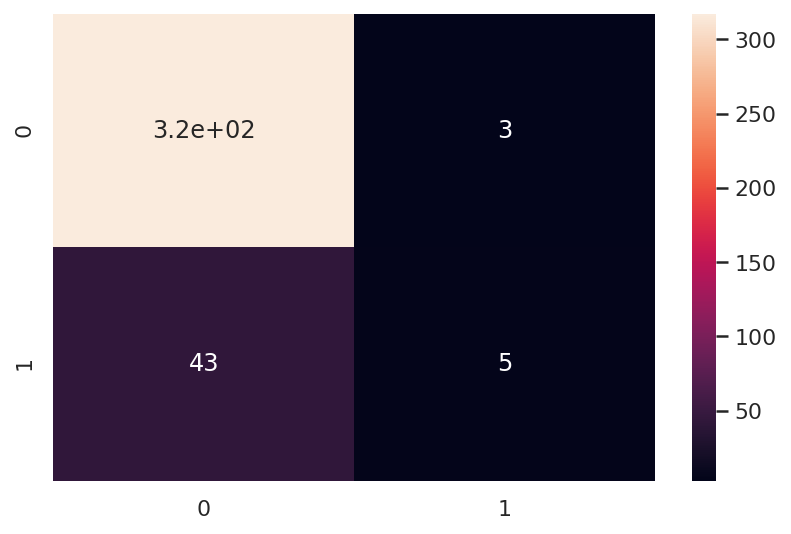

In [27]:
#show the confusion matrix and accuracy score for the model on the test data

from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(Y_test,forest.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]


print(cm)

print('Model Testing Accuracy = {}'.format((TP + TN)/(TP + TN + FN +FP)))

sn.heatmap(cm, annot=True)
plt.show()


In [28]:

predictions=forest.predict(X_test)
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       320
           1       0.62      0.10      0.18        48

    accuracy                           0.88       368
   macro avg       0.75      0.55      0.56       368
weighted avg       0.85      0.88      0.83       368



**Using Logistic Regression**

In [29]:
X = HR.iloc[:,1:HR.shape[1]].values
Y = HR.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size=0.25, random_state= 42)

In [30]:
clf = LogisticRegression(class_weight="balanced")

#Training the Model
clf_trained = clf.fit(X_train, Y_train) #Output shown below


In [31]:
clf_trained.score(X_train,Y_train) # Output shown below

0.6787658802177858

In [32]:
clf_trained.score(X_test,Y_test) # Output shown below

0.6902173913043478

In [33]:
predictions=clf_trained.predict(X_test)
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.70      0.80       320
           1       0.24      0.65      0.35        48

    accuracy                           0.69       368
   macro avg       0.59      0.67      0.57       368
weighted avg       0.84      0.69      0.74       368



[[223  97]
 [ 17  31]]
Model Testing Accuracy = 0.6902173913043478


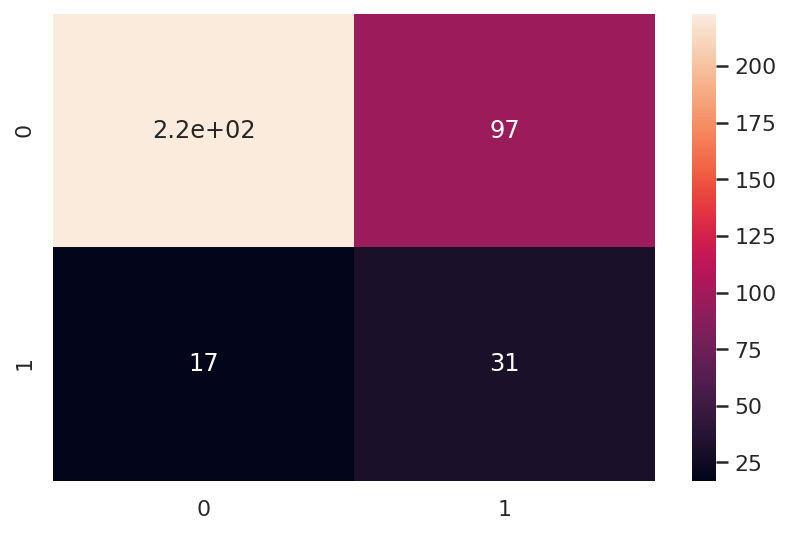

In [34]:

from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(Y_test,clf_trained.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]


print(cm)

print('Model Testing Accuracy = {}'.format((TP + TN)/(TP + TN + FN +FP)))

sn.heatmap(cm, annot=True)
plt.show()

KNNeighborsClassifier 

In [35]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size = 0.25, random_state = 42) 

The optimal number of neighbors is  21 


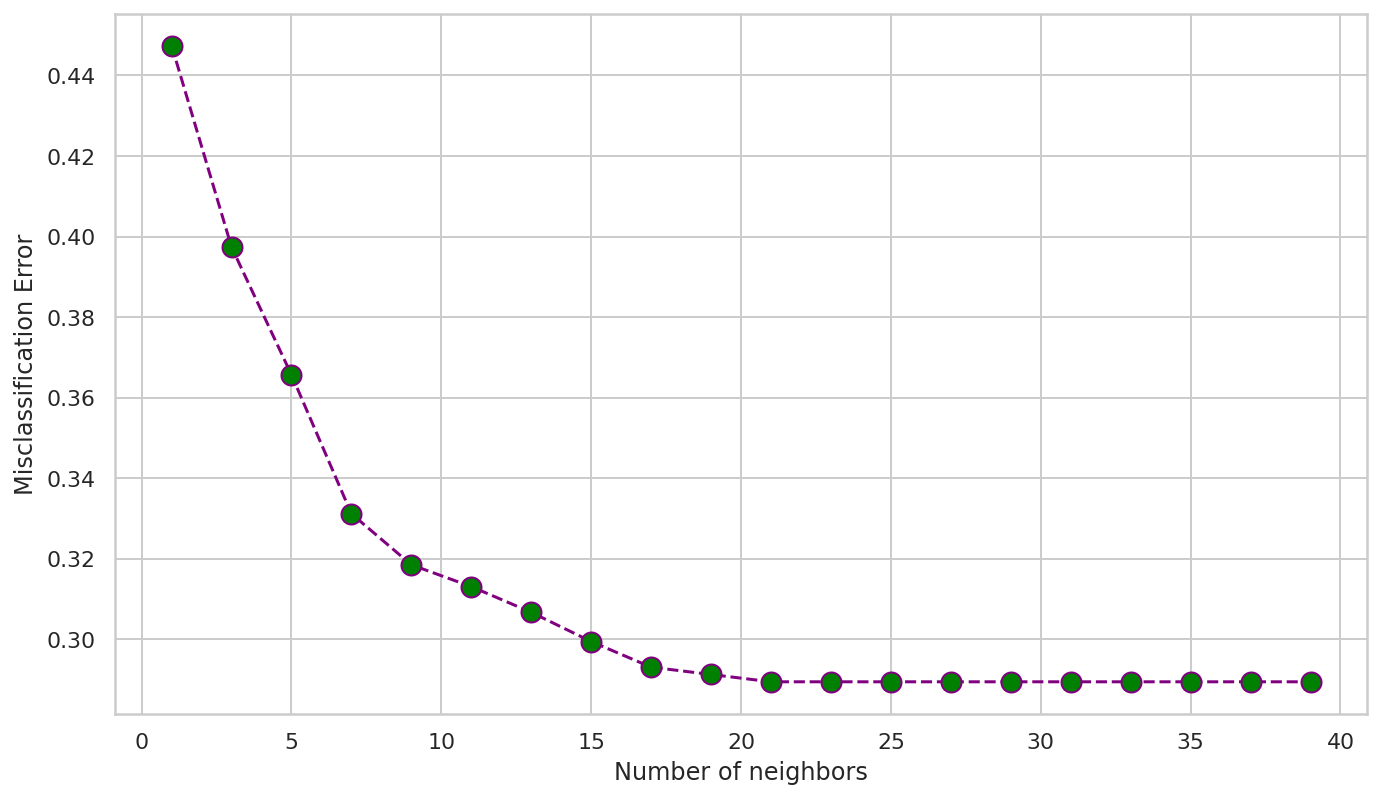

In [36]:
from sklearn.neighbors import KNeighborsClassifier 
neighbors = [] 
cv_scores = [] 
	
from sklearn.model_selection import cross_val_score 
# perform 10 fold cross validation 
for k in range(1, 40, 2): 
	neighbors.append(k) 
	knn = KNeighborsClassifier(n_neighbors = k) 
	scores = cross_val_score( 
		knn, X_train, y_train, cv = 10, scoring = 'accuracy') 
	cv_scores.append(scores.mean()) 
error_rate = [1-x for x in cv_scores] 
	
# determining the best k 
optimal_k = neighbors[error_rate.index(min(error_rate))] 
print('The optimal number of neighbors is % d ' % optimal_k) 
	
# plot misclassification error versus k 
plt.figure(figsize = (10, 6)) 
plt.plot(range(1, 40, 2), error_rate, color ='purple', linestyle ='dashed', marker ='o', 
		markerfacecolor ='green', markersize = 10) 
plt.xlabel('Number of neighbors') 
plt.ylabel('Misclassification Error') 
plt.show() 


In [37]:
from sklearn.model_selection import cross_val_predict, cross_val_score 
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import confusion_matrix 

def print_score(clf, X_train, y_train, X_test, y_test, train = True): 
	if train: 
		print("Train Result:") 
		print("------------") 
		print("Classification Report: \n {}\n".format(classification_report( 
				y_train, clf.predict(X_train)))) 
		print("Confusion Matrix: \n {}\n".format(confusion_matrix( 
				y_train, clf.predict(X_train)))) 

		res = cross_val_score(clf, X_train, y_train, 
							cv = 10, scoring ='accuracy') 
		print("Average Accuracy: \t {0:.4f}".format(np.mean(res))) 
		print("Accuracy SD: \t\t {0:.4f}".format(np.std(res))) 
		print("accuracy score: {0:.4f}\n".format(accuracy_score( 
				y_train, clf.predict(X_train)))) 
		print("----------------------------------------------------------") 
				
	elif train == False: 
		print("Test Result:") 
		print("-----------") 
		print("Classification Report: \n {}\n".format( 
				classification_report(y_test, clf.predict(X_test)))) 
		print("Confusion Matrix: \n {}\n".format( 
				confusion_matrix(y_test, clf.predict(X_test)))) 
		print("accuracy score: {0:.4f}\n".format( 
				accuracy_score(y_test, clf.predict(X_test)))) 
		print("-----------------------------------------------------------") 
		
knn = KNeighborsClassifier(n_neighbors = 7) 
knn.fit(X_train, y_train) 
print_score(knn, X_train, y_train, X_test, y_test, train = True) 
print_score(knn, X_train, y_train, X_test, y_test, train = False) 


Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.40      0.08      0.13       106
           1       0.56      0.20      0.29       213
           2       0.75      0.96      0.84       783

    accuracy                           0.73      1102
   macro avg       0.57      0.41      0.42      1102
weighted avg       0.68      0.73      0.67      1102


Confusion Matrix: 
 [[  8   8  90]
 [  7  42 164]
 [  5  25 753]]

Average Accuracy: 	 0.6688
Accuracy SD: 		 0.0186
accuracy score: 0.7287

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.09      0.03      0.05        64
           2       0.70      0.92      0.80       260

    accuracy                           0.66       368
   macro avg       0.26      0.32      0.28 

# Conclusion 

Spliting the data for testing


In [51]:
X = HR.iloc[:,1:HR.shape[1]].values
Y = HR.iloc[:,0].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                   test_size=0.20, random_state= 40)


As the dataset imbalance in order to get higher accurate SMOTE is used

In [39]:
oversampler=SMOTE(random_state=42)
x_train_smote,  y_train_smote = oversampler.fit_sample(X_train,Y_train)

In [52]:
def compare(model):
    clf=model
    clf.fit(x_train_smote,y_train_smote)
    pred=clf.predict(X_test)
    
    # Calculating various metrics
    
    acc.append(accuracy_score(pred,Y_test))
    prec.append(precision_score(pred,Y_test))
    rec.append(recall_score(pred,Y_test))
    auroc.append(roc_auc_score(pred,Y_test))
    

Comparing models to see which perform well.

In [53]:
acc=[]
prec=[]
rec=[]
auroc=[]
models=[SVC(kernel='rbf'),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),KNeighborsClassifier(),GaussianProcessClassifier(), MLPClassifier(),QuadraticDiscriminantAnalysis(),XGBClassifier()
]
model_names=['rbfSVM','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','KNeighborsClassifier','GaussianProcessClassifier', 'MLPClassifier','QuadraticDiscriminantAnalysis','XGBClassifier']

for model in range(len(models)):
    compare(models[model])
    
d={'Modelling Algo':model_names,'Accuracy':acc,'Precision':prec,'Recall':rec,'Area Under ROC Curve':auroc}
met_df=pd.DataFrame(d)
met_df

,Modelling Algo,Accuracy,Precision,Recall,Area Under ROC Curve
0,rbfSVM,0.731293,0.551020,0.321429,0.608333
1,RandomForestClassifier,0.959184,0.836735,0.911111,0.939491
2,GradientBoostingClassifier,0.908163,0.775510,0.703704,0.828935
3,AdaBoostClassifier,0.819728,0.714286,0.472973,0.704668
4,KNeighborsClassifier,0.751701,0.775510,0.380000,0.661649
5,GaussianProcessClassifier,0.959184,0.775510,0.974359,0.965611
6,MLPClassifier,0.666667,0.877551,0.318519,0.640391
7,QuadraticDiscriminantAnalysis,0.802721,0.693878,0.441558,0.686217
8,XGBClassifier,0.897959,0.714286,0.686275,0.814331


In [54]:
def comp_models(met_df,metric):
    sns.set_palette("cool")   
    sns.factorplot(data=met_df,x=metric,y='Modelling Algo',size=5,aspect=2,kind='bar')
    sns.factorplot(data=met_df,y=metric,x='Modelling Algo',size=10,aspect=2,kind='point')
    

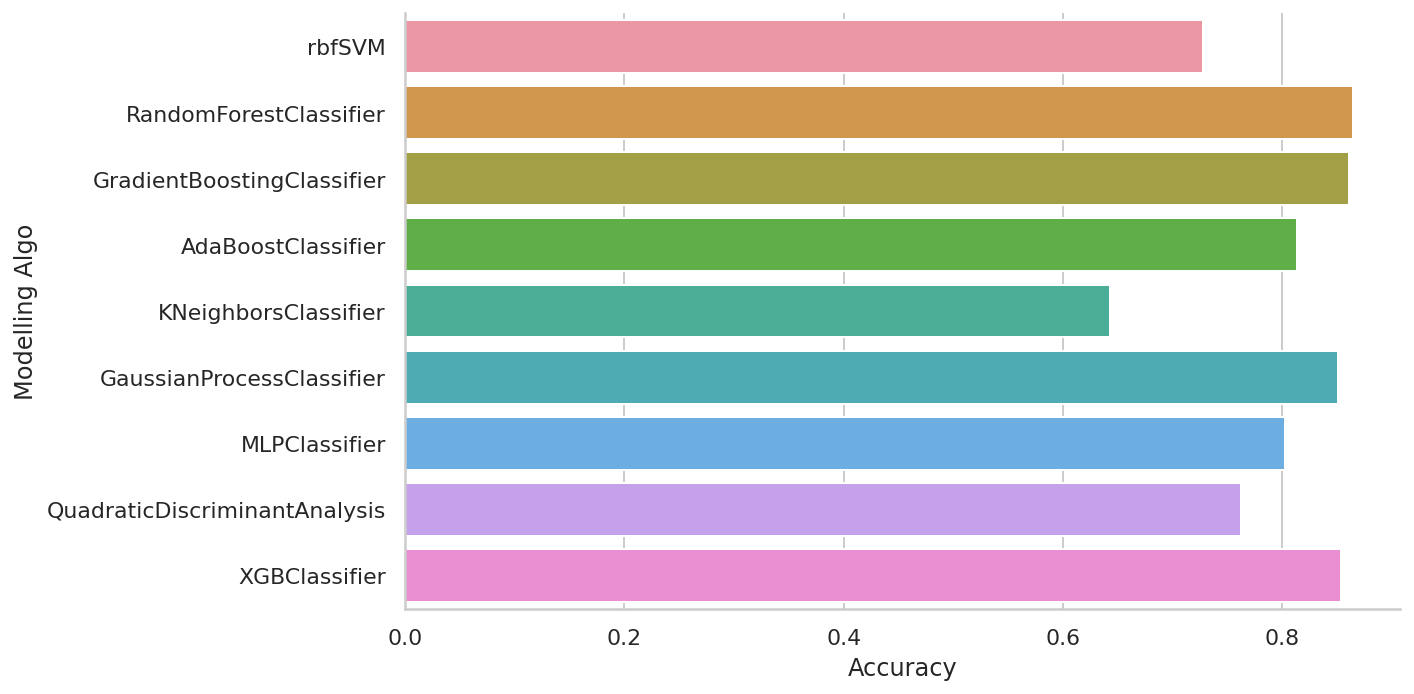

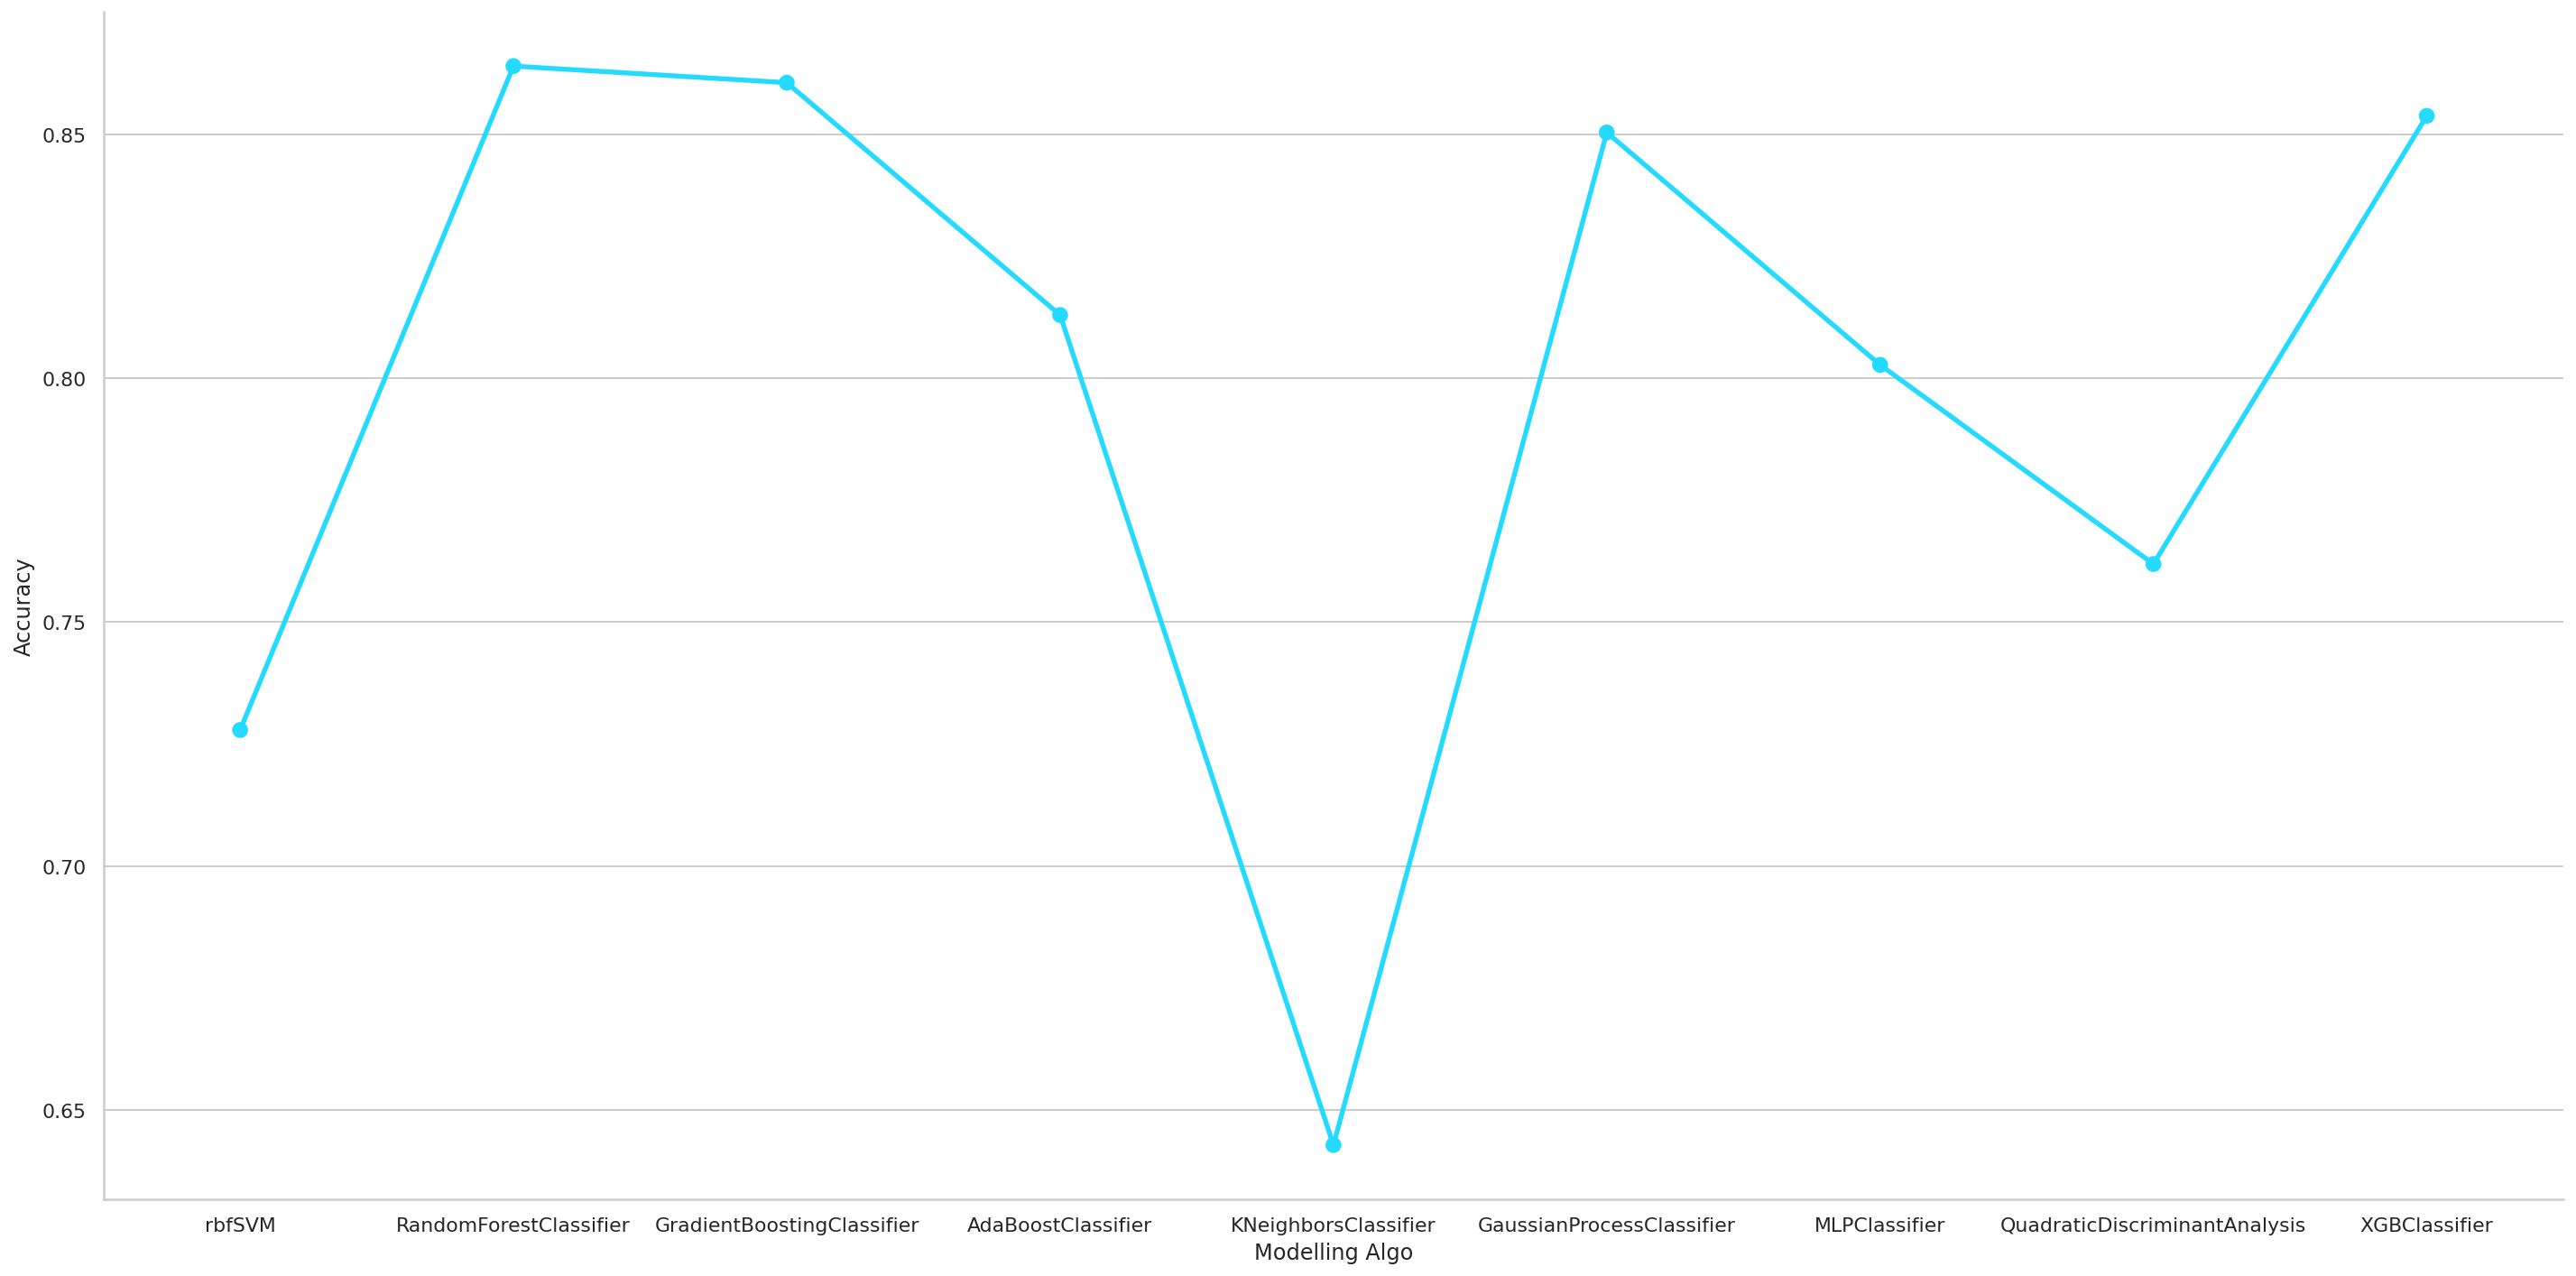

In [43]:
comp_models(met_df,'Accuracy')



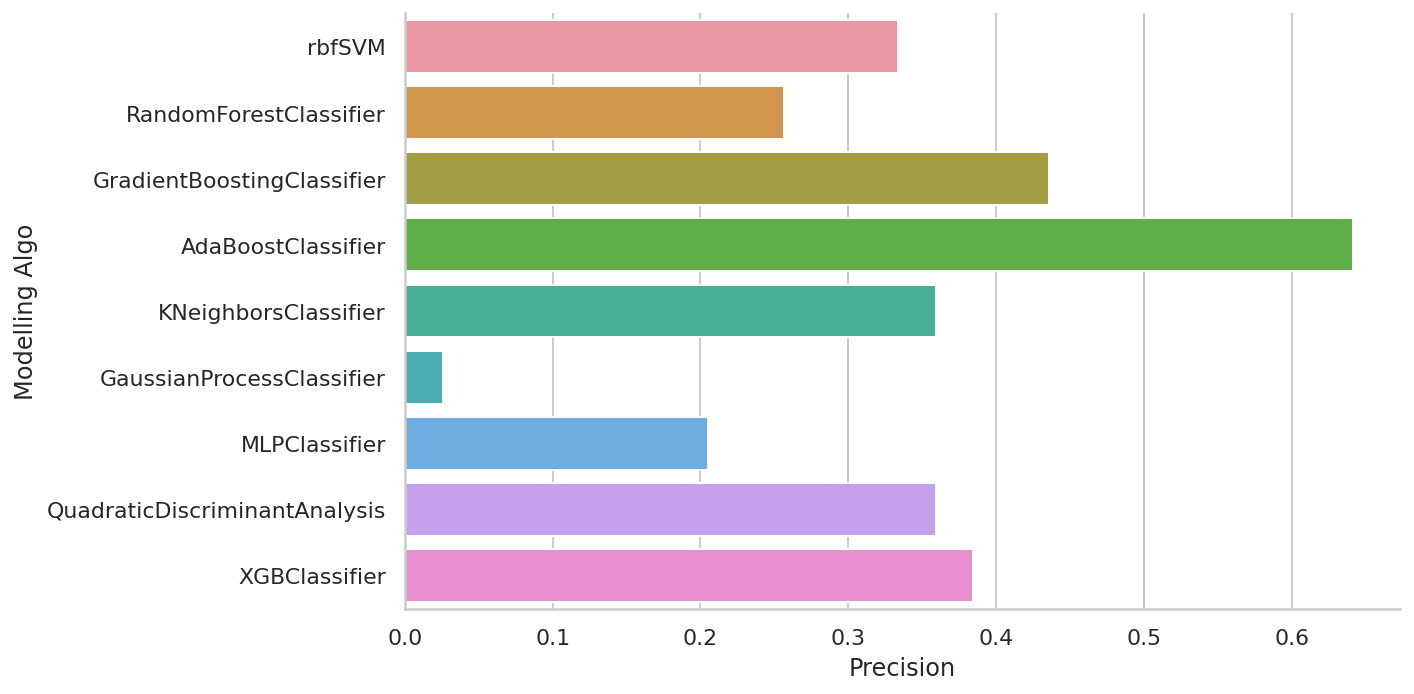

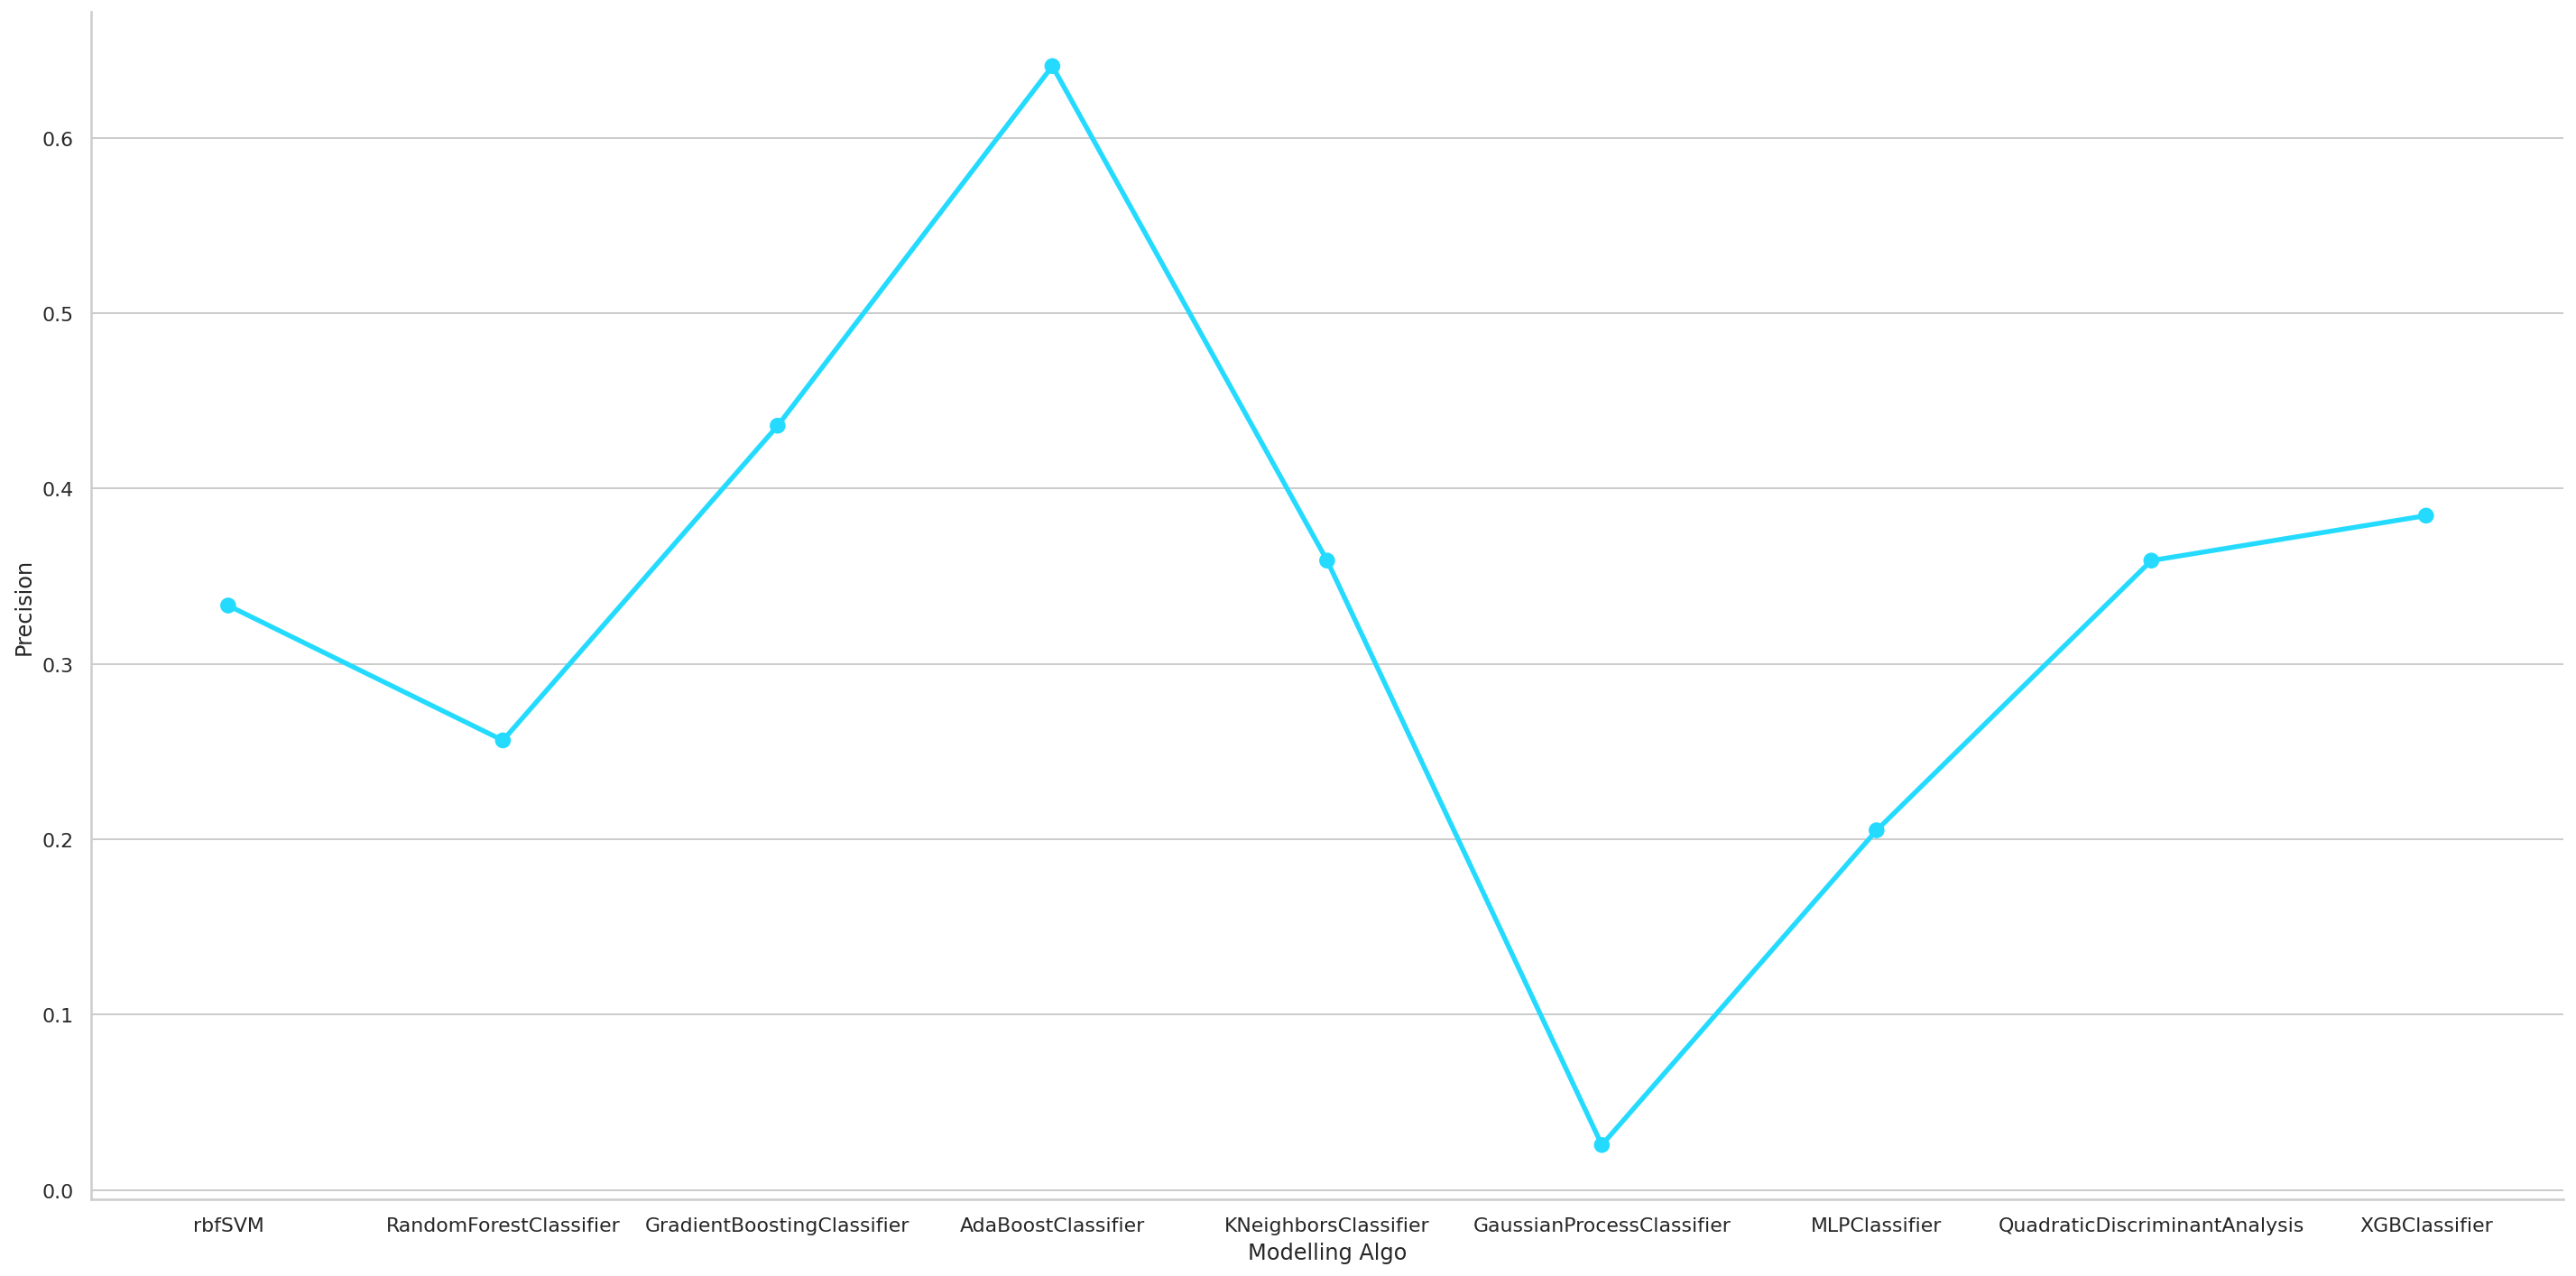

In [44]:
comp_models(met_df,'Precision')

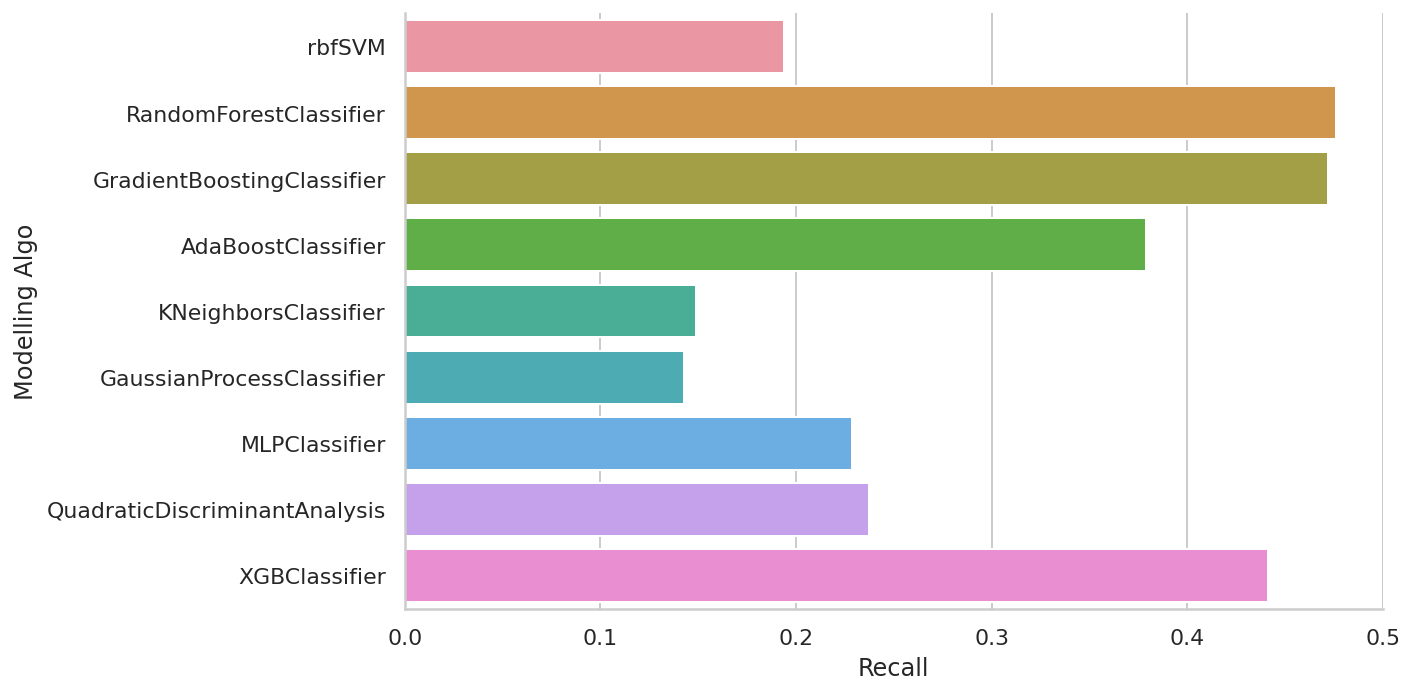

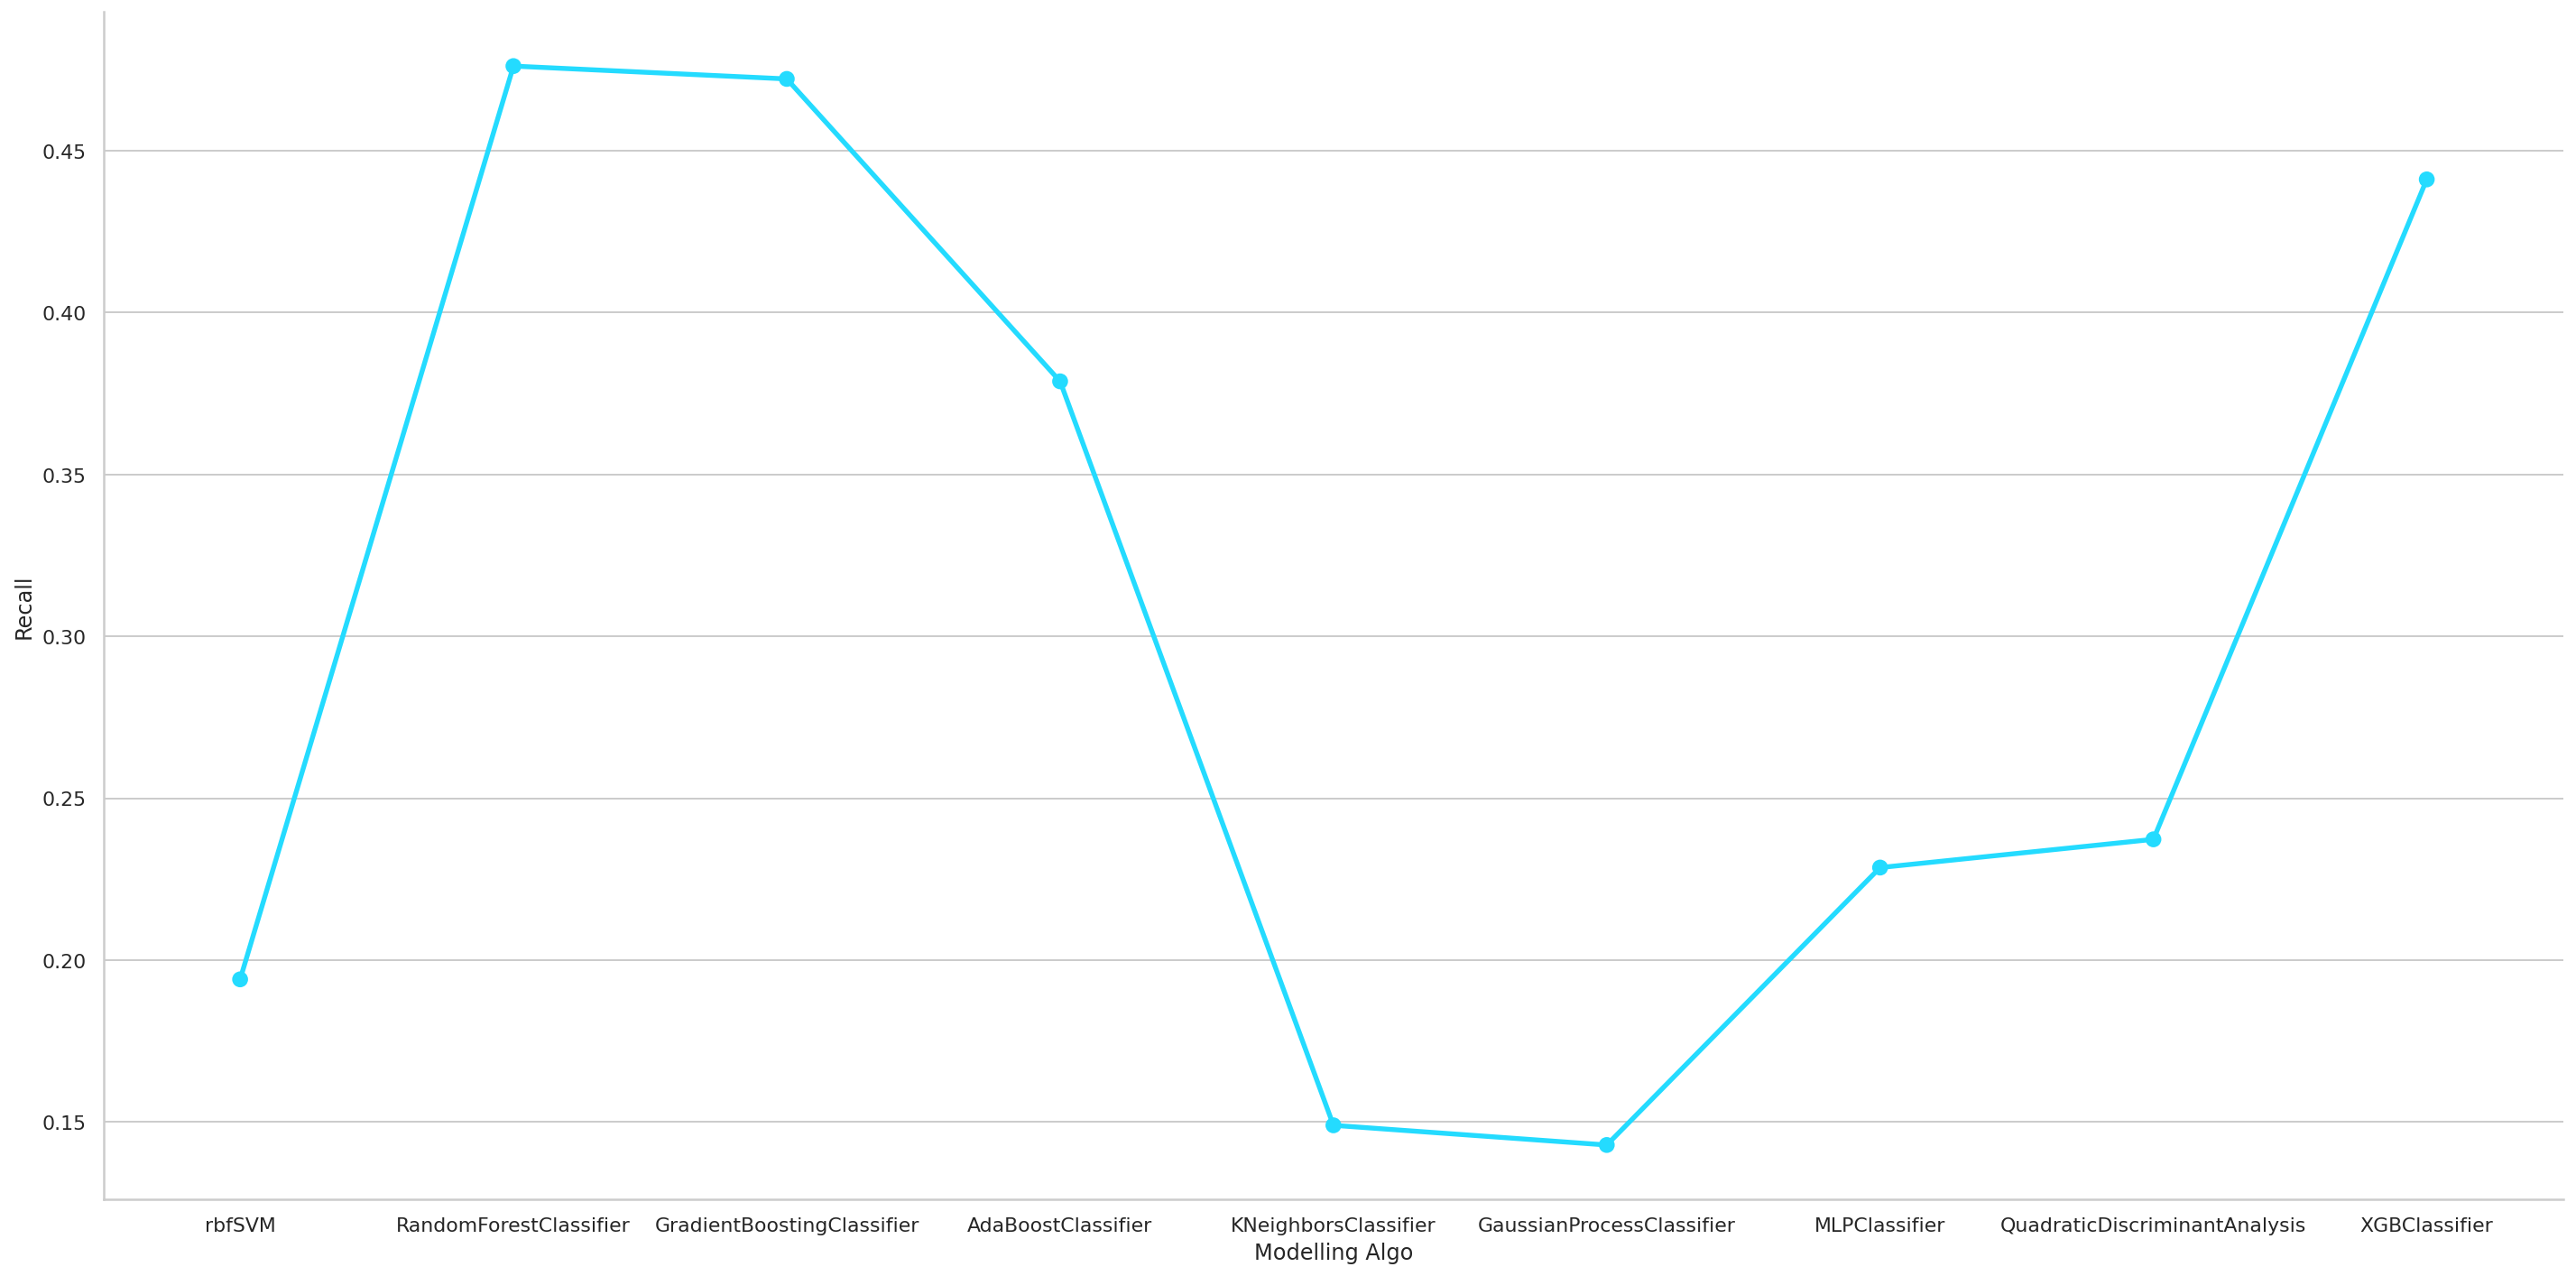

In [45]:
comp_models(met_df,'Recall')

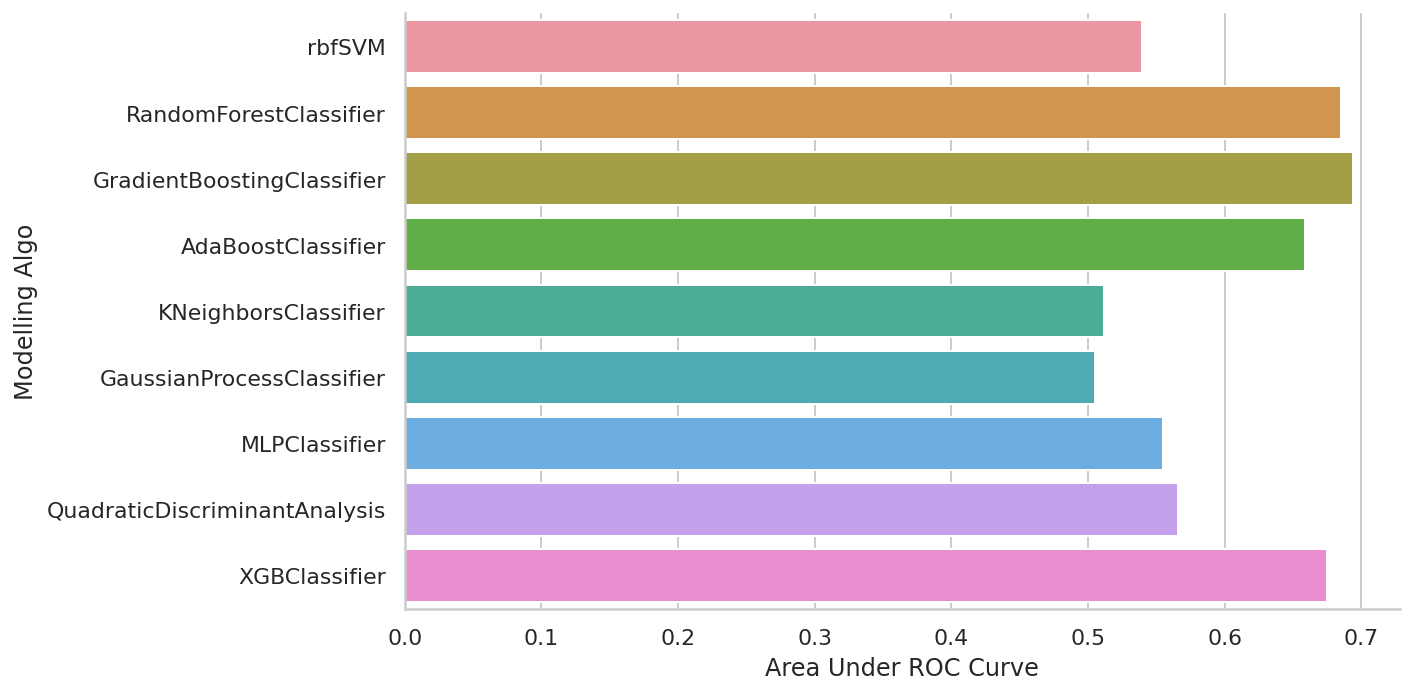

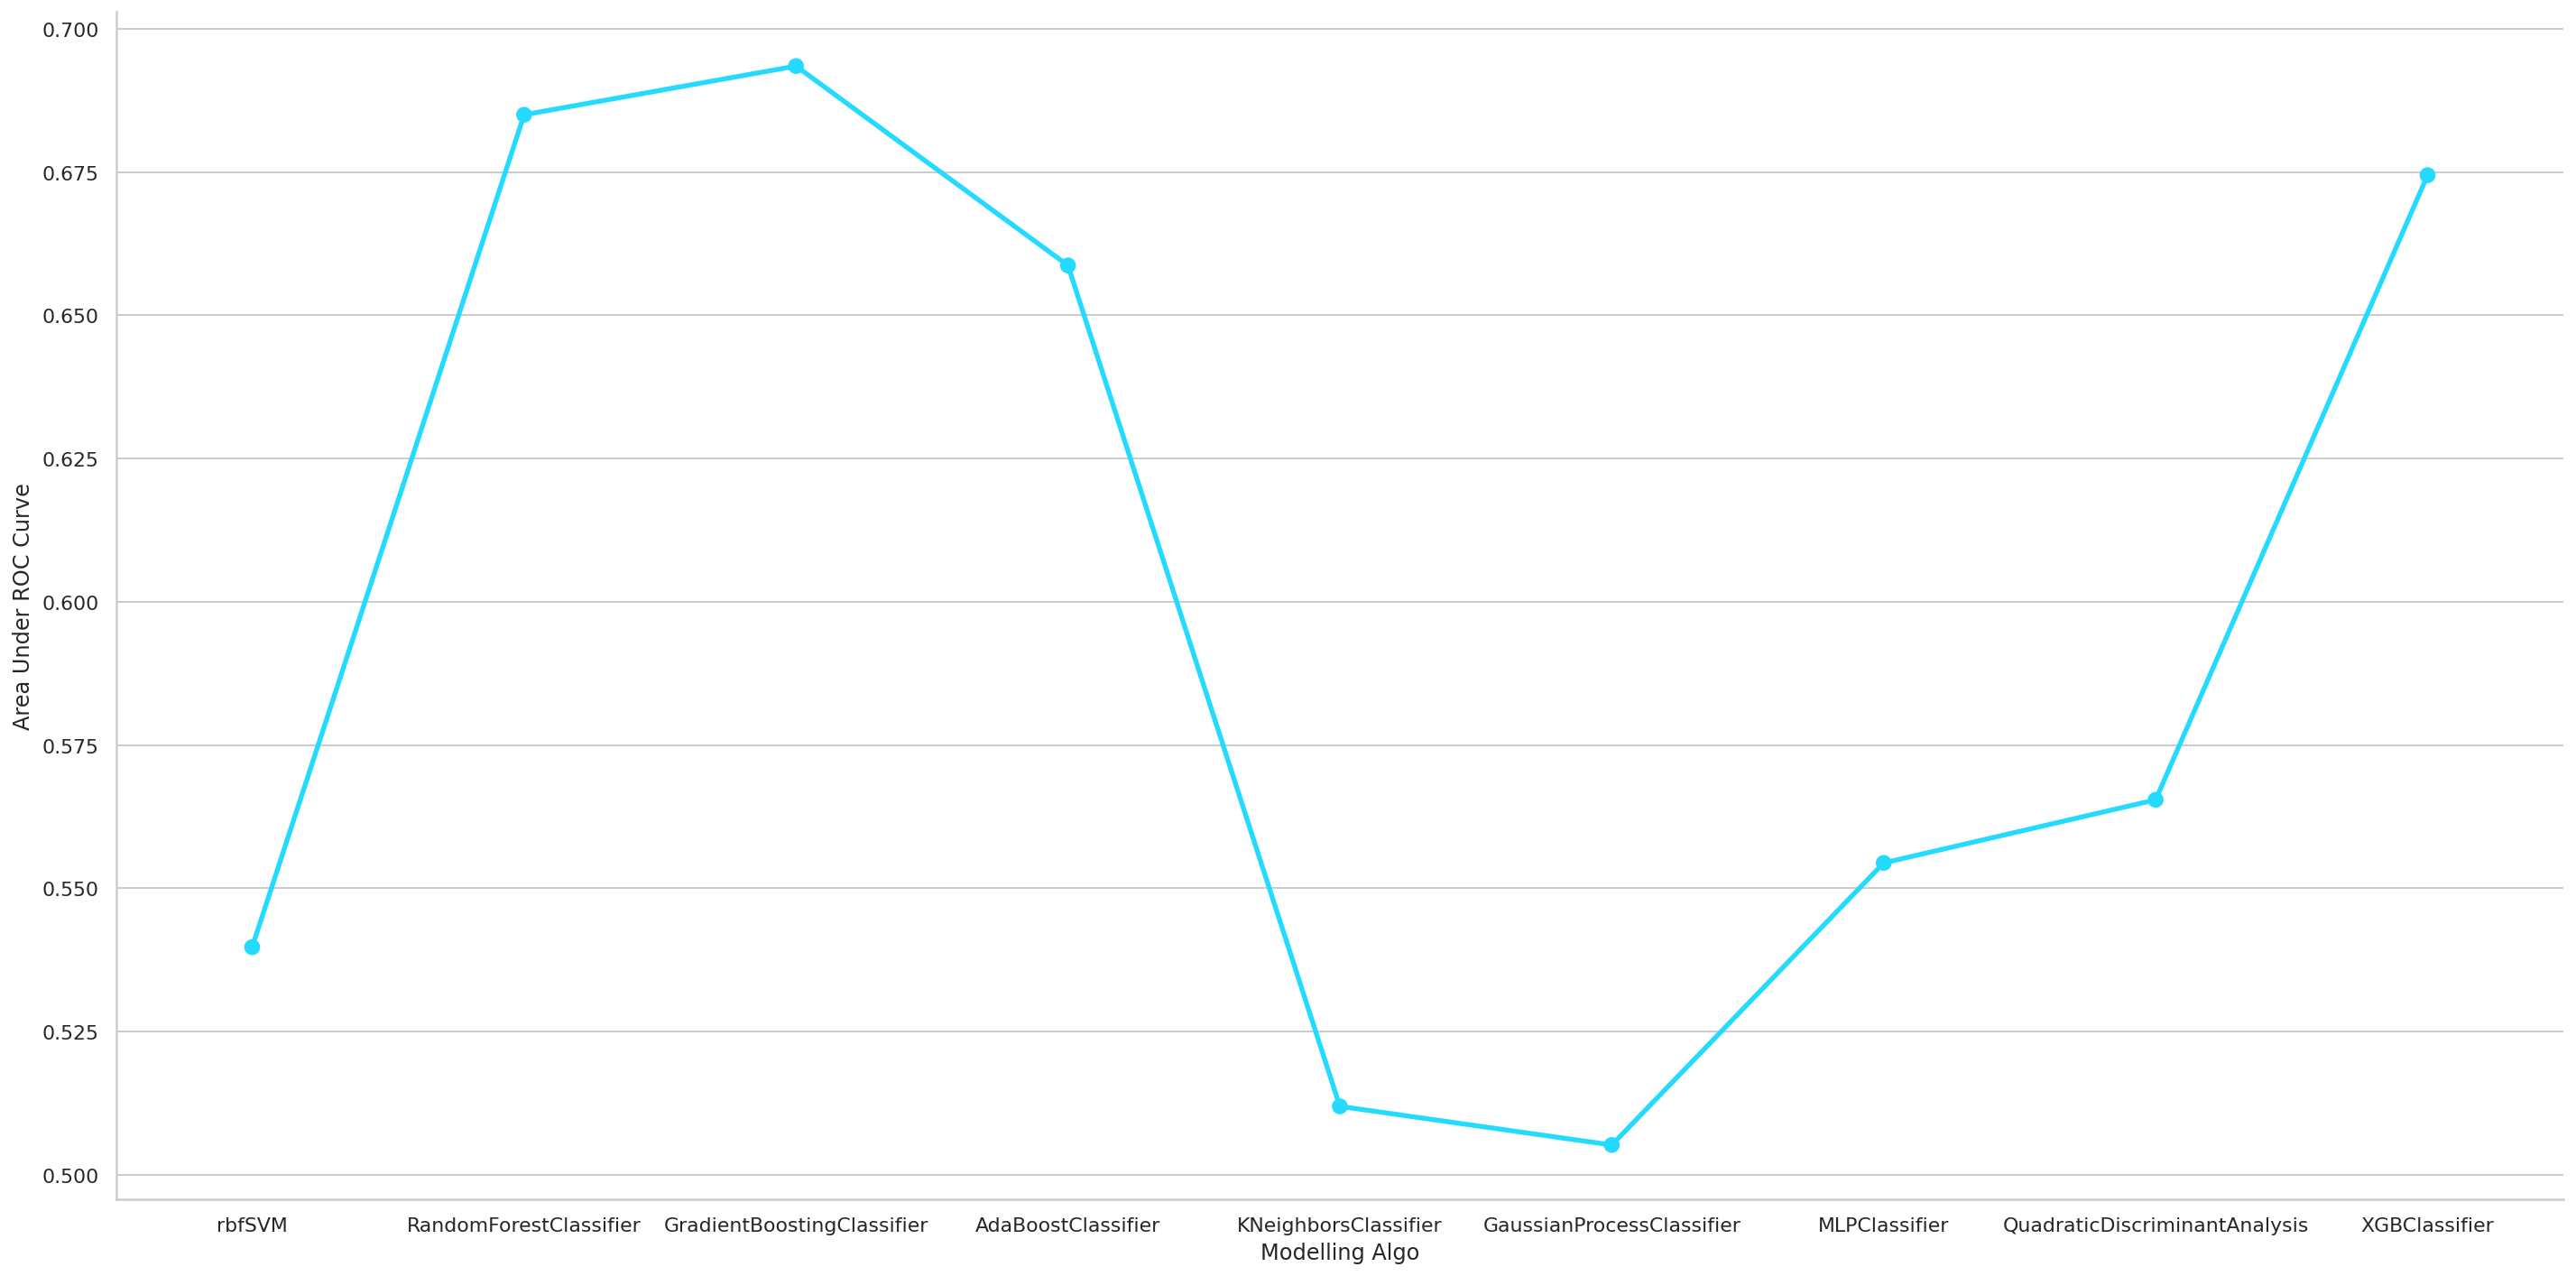

In [46]:
comp_models(met_df,'Area Under ROC Curve')